In [1]:
# import the necessary / common libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Datasets

In [2]:
# load application dataset

app_data = pd.read_csv("datasets/application_record.csv")

In [3]:
# load credit dataset

credit_data = pd.read_csv("datasets/credit_record.csv")

# Application Records EDA

In [4]:
app_data.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [5]:
app_data.shape

(438557, 18)

In [6]:
app_data.isnull().sum()

# occupation column has a lot

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
# check for duplicated records

app_data[app_data.duplicated()]

Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS]
Index: []

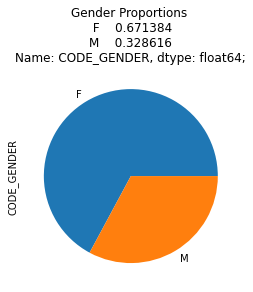

In [8]:
# gender proportions

gender_val = app_data.CODE_GENDER.value_counts(normalize = True)
gender_val.plot.pie()
ax = plt.title('Gender Proportions \n {};'.format(gender_val))
plt.show()

# 67.14% of the applicants are females

In [9]:
# Home Ownerships by Gender

home_ownership_count = app_data.groupby(['CODE_GENDER', 'NAME_HOUSING_TYPE']).agg({'ID': 'count'})
home_ownership_count

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [10]:
# Home Ownership in %

home_ownership_percent = home_ownership_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
home_ownership_percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

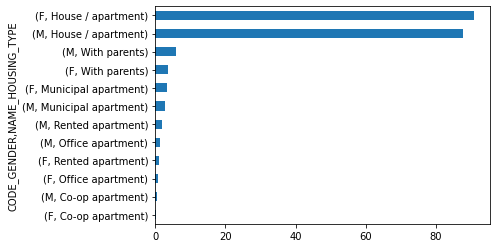

In [11]:
# plot horizontal bar chart for home ownership

home_ownership_percent.sort_values(by = 'ID').plot.barh()
plt.gca().get_legend().remove()
plt.show()

# higher home ownership % for females than males

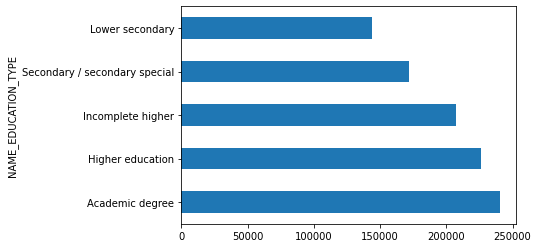

In [12]:
# education level and income relation

app_data.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

# income increases as education level does

# Credit Records EDA

In [13]:
credit_data.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [14]:
credit_data.shape

(1048575, 3)

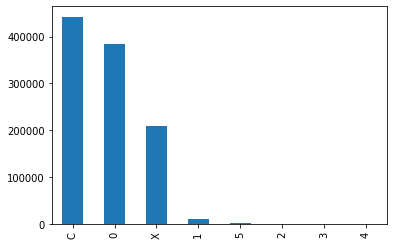

In [15]:
# status distribution

credit_data.STATUS.value_counts().plot.bar()
plt.show()

In [16]:
# find out for how long each customer has had a card

credit_data['MONTHS_BALANCE'] = credit_data.MONTHS_BALANCE.apply(lambda x : x*(-1))
cardholder_tenure = pd.DataFrame(credit_data.groupby('ID').agg({'MONTHS_BALANCE' : max}))
cardholder_tenure.rename(columns = {'MONTHS_BALANCE':'CUST_FOR_MONTHS'}, inplace = True)
cardholder_tenure.head()

CUST_FOR_MONTHS
ID                      
5001711                3
5001712               18
5001713               21
5001714               14
5001715               59

# Merging Modified Credit & Application Records

In [17]:
# merge application and credit records to get the number of months for which customer has had a card

cust_data = pd.merge(app_data, cardholder_tenure, on = 'ID', how = 'inner')
cust_data.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  CUST_FOR_MONTHS  
0              2.0               15  
1              2.0               14  
2              2.0               29  
3              1.0                4  
4              1.0               26

In [18]:
cust_data.shape

(36457, 19)

In [19]:
# change status of "C" and "X" to -1 as they have either paid off or have no loan for that month

credit_data['STATUS'][credit_data["STATUS"] == 'C'] = -1
credit_data['STATUS'][credit_data["STATUS"] == 'X'] = -1
credit_data.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0     -1
1  5001711               1      0
2  5001711               2      0
3  5001711               3      0
4  5001712               0     -1

In [20]:
credit_data['STATUS'] = credit_data.STATUS.apply(lambda x : int(x))

In [21]:
# drop duplicates

credit_data.sort_values(by = 'STATUS', ascending = False, inplace = True)
credit_data.drop_duplicates(subset = ['ID'], inplace = True)
credit_data.shape

(45985, 3)

In [22]:
# assuming that after 60 days of payment withstanding, customers are defaulters
# hence, status >= 2 will be considered as so

credit_data['target'] = credit_data.STATUS.apply(lambda x : 1 if x>=2 else 0)
credit_data.drop(['STATUS', 'MONTHS_BALANCE'], axis = 1, inplace = True)
credit_data.head()

ID  target
372050  5042064       1
307952  5029028       1
723708  5097065       1
942335  5135344       1
832456  5117313       1

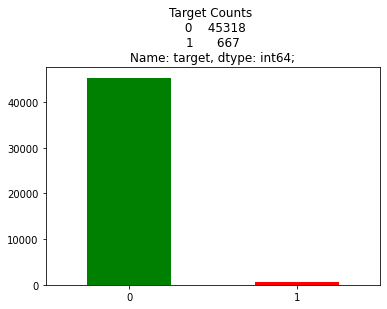

In [23]:
default_val = credit_data.target.value_counts()
default_val.plot.bar(color = ["green", "red"])
ax = plt.title('Target Counts \n {};'.format(default_val))
plt.xticks(rotation = 0)
plt.show()

In [24]:
merged = pd.merge(cust_data, credit_data, on = "ID", how = "inner")
merged.shape

(36457, 20)

In [25]:
merged.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  CUST_FOR_MONTHS  target  
0              2.0               15       0  
1              2.0               14       0  
2              2.0               29       0  
3              1.0                4       0  
4              1.0               26       0

In [26]:
# drop duplicated values

merged.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'CUST_FOR_MONTHS',
       'target'], inplace = True)
merged.shape

(32177, 20)

## Merged Records EDA

**Credit records on Income Type**

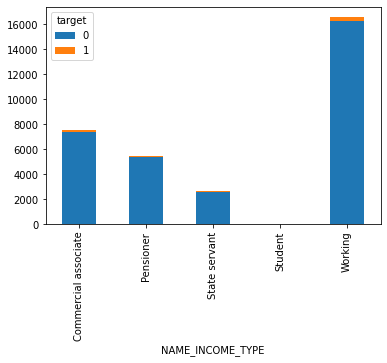

In [27]:
cr_income = merged.groupby(["NAME_INCOME_TYPE"]).target.value_counts().unstack()
cr_income.plot(kind = 'bar', stacked=True)
plt.show()

**Defaulters by Occupational Type**

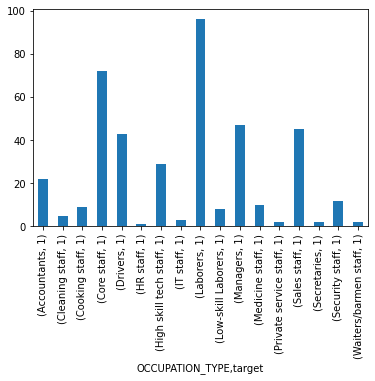

In [28]:
d_occupational_type = merged[merged.target == 1].groupby("OCCUPATION_TYPE").target.value_counts()
d_occupational_type.plot(kind = 'bar')
plt.show()

**Defaulters by AMT_INCOME_TOTAL Type**

In [29]:
print(merged["AMT_INCOME_TOTAL"].min())
print(merged["AMT_INCOME_TOTAL"].max())

27000.0
1575000.0


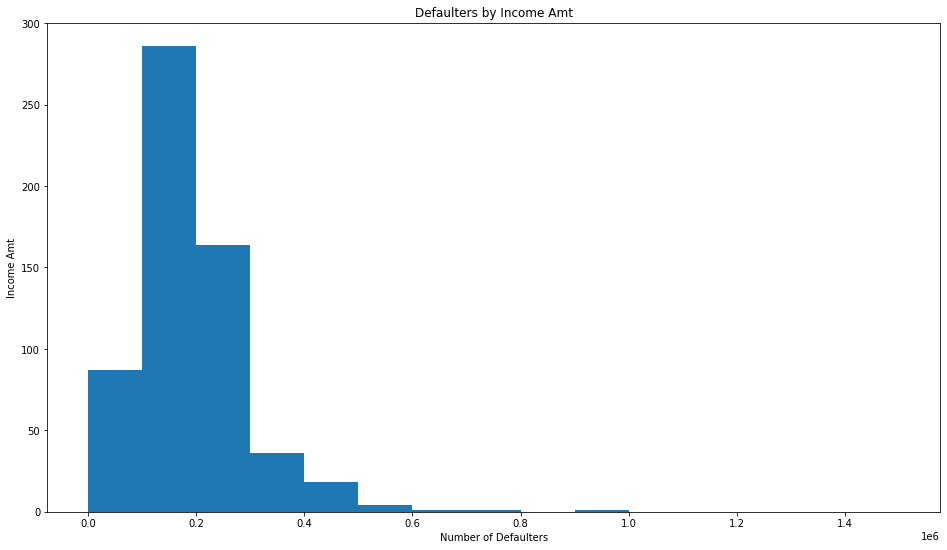

In [30]:
plt.figure(figsize=(16,9))
#normal
plt.hist(merged[merged.target == 1]["AMT_INCOME_TOTAL"], stacked=True, bins =range(0,1600000,100000))
#To see the smaller values, Log=True
# plt.hist(modified[modified.target == 1]["AMT_INCOME_TOTAL"], stacked=True, bins =range(0,1600000,100000),log=True)
#stacked histo
# plt.hist([modified[modified.target == 1]["AMT_INCOME_TOTAL"],modified[modified.target == 0]["AMT_INCOME_TOTAL"]],  stacked=True,bins =range(0,1600000,100000))

plt.title("Defaulters by Income Amt")
plt.xlabel("Number of Defaulters")
plt.ylabel("Income Amt")
plt.show()

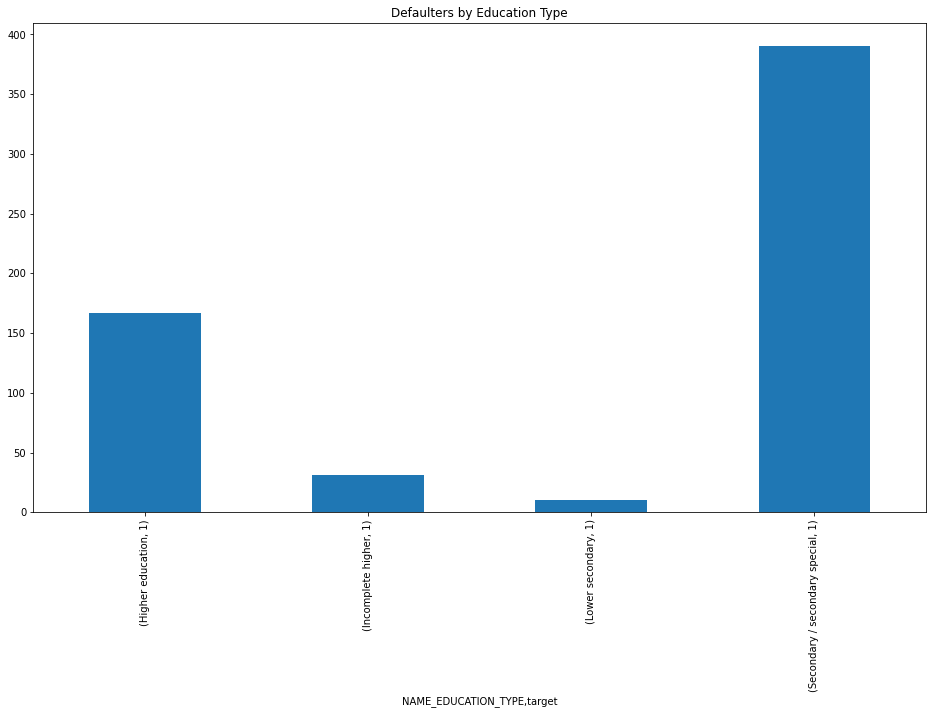

In [31]:
d_education_type = merged[merged.target == 1].groupby("NAME_EDUCATION_TYPE").target.value_counts()
d_education_type.plot(kind='bar', figsize=(16,9),title="Defaulters by Education Type")
plt.show()

## Further Preprocessing for Merged Records

In [32]:
# drop ID since it provides no value

merged.drop("ID", axis = 1, inplace = True)

In [33]:
merged.isnull().sum()

CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        9980
CNT_FAM_MEMBERS           0
CUST_FOR_MONTHS           0
target                    0
dtype: int64

In [34]:
# there are many null values for OCCUPATION_TYPE, hence we will assume that if null, the person is unemployed

merged['OCCUPATION_TYPE'] = merged.OCCUPATION_TYPE.apply(lambda x : 'Unemployed' if pd.isnull(x) else x)

In [35]:
# check to see if anymore null records

merged.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
CUST_FOR_MONTHS        0
target                 0
dtype: int64

In [36]:
# convert binary categorical columns

merged['CODE_GENDER'] = merged.CODE_GENDER.apply(lambda x : 0 if x == 'M' else 1)
merged['FLAG_OWN_CAR'] = merged.FLAG_OWN_CAR.apply(lambda x : 0 if x == 'N' else 1)
merged['FLAG_OWN_REALTY'] = merged.FLAG_OWN_REALTY.apply(lambda x : 0 if x == 'N' else 1)
merged.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            0             1                1             0          427500.0   
1            0             1                1             0          427500.0   
2            0             1                1             0          112500.0   
3            1             0                1             0          270000.0   
4            1             0                1             0          270000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0   Rented apartment      -12005          -4542           1                1   
1   Rented apartment      -12005          -4542           1                1   
2  House / apartment      -21474          -1134           1                0   
3  House / apartment      -19110          -3051           1                0   
4  House / apartment      -19110          -3051           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  CUST_FOR_MONTHS  \
0           0           0      Unemployed              2.0               15   
1           0           0      Unemployed              2.0               14   
2           0           0  Security staff              2.0               29   
3           1           1     Sales staff              1.0                4   
4           1           1     Sales staff              1.0               26   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [37]:
merged.FLAG_MOBIL.value_counts()

1    32177
Name: FLAG_MOBIL, dtype: int64

In [38]:
# since all rows have FLAG_MOBIL as 1, there isn't much value add and it will be dropped

merged.drop("FLAG_MOBIL", axis = 1, inplace = True)

In [39]:
# convert CNT_FAM_MEMBERS to integer

merged['CNT_FAM_MEMBERS'] = merged['CNT_FAM_MEMBERS'].astype('int')
merged.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            0             1                1             0          427500.0   
1            0             1                1             0          427500.0   
2            0             1                1             0          112500.0   
3            1             0                1             0          270000.0   
4            1             0                1             0          270000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
0   Rented apartment      -12005          -4542                1           0   
1   Rented apartment      -12005          -4542                1           0   
2  House / apartment      -21474          -1134                0           0   
3  House / apartment      -19110          -3051                0           1   
4  House / apartment      -19110          -3051                0           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  CUST_FOR_MONTHS  target  
0           0      Unemployed                2               15       0  
1           0      Unemployed                2               14       0  
2           0  Security staff                2               29       0  
3           1     Sales staff                1                4       0  
4           1     Sales staff                1               26       0

In [40]:
# since both DAYS_BIRTH and DAYS_EMPLOYED are backwards counted, we need to make them positive

merged["DAYS_BIRTH"] = merged["DAYS_BIRTH"].apply(lambda x : x*-1)
merged["DAYS_EMPLOYED"] = merged["DAYS_EMPLOYED"].apply(lambda x : x*-1)
merged.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            0             1                1             0          427500.0   
1            0             1                1             0          427500.0   
2            0             1                1             0          112500.0   
3            1             0                1             0          270000.0   
4            1             0                1             0          270000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
0   Rented apartment       12005           4542                1           0   
1   Rented apartment       12005           4542                1           0   
2  House / apartment       21474           1134                0           0   
3  House / apartment       19110           3051                0           1   
4  House / apartment       19110           3051                0           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  CUST_FOR_MONTHS  target  
0           0      Unemployed                2               15       0  
1           0      Unemployed                2               14       0  
2           0  Security staff                2               29       0  
3           1     Sales staff                1                4       0  
4           1     Sales staff                1               26       0

In [41]:
# convert days to years

merged["EMP_YEARS"] = merged.DAYS_EMPLOYED / 365
merged["AGE"] = merged.DAYS_BIRTH / 365
merged.drop(["DAYS_BIRTH","DAYS_EMPLOYED"], axis = 1, inplace = True)
merged.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            0             1                1             0          427500.0   
1            0             1                1             0          427500.0   
2            0             1                1             0          112500.0   
3            1             0                1             0          270000.0   
4            1             0                1             0          270000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0   Rented apartment                1           0           0      Unemployed   
1   Rented apartment                1           0           0      Unemployed   
2  House / apartment                0           0           0  Security staff   
3  House / apartment                0           1           1     Sales staff   
4  House / apartment                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  CUST_FOR_MONTHS  target  EMP_YEARS        AGE  
0                2               15       0  12.443836  32.890411  
1                2               14       0  12.443836  32.890411  
2                2               29       0   3.106849  58.832877  
3                1                4       0   8.358904  52.356164  
4                1               26       0   8.358904  52.356164

In [42]:
# assume that if EMP_YEARS < 0, they are pensioners, hence change EMP_YEARS to -1 for them

merged['EMP_YEARS'] = merged.EMP_YEARS.apply(lambda x : -1 if x<0 else x)

# Classification Models

In [43]:
# to facilitate the plotting of ROCAUC curve

from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [44]:
# for svm, set binary=True
def plot_ROC_curve_svm(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, binary=True)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [45]:
# create deep copy of merged so that it doesn't affect the original merged copy

merged_for_predictions = merged.copy()
merged_for_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32177 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          32177 non-null  int64  
 1   FLAG_OWN_CAR         32177 non-null  int64  
 2   FLAG_OWN_REALTY      32177 non-null  int64  
 3   CNT_CHILDREN         32177 non-null  int64  
 4   AMT_INCOME_TOTAL     32177 non-null  float64
 5   NAME_INCOME_TYPE     32177 non-null  object 
 6   NAME_EDUCATION_TYPE  32177 non-null  object 
 7   NAME_FAMILY_STATUS   32177 non-null  object 
 8   NAME_HOUSING_TYPE    32177 non-null  object 
 9   FLAG_WORK_PHONE      32177 non-null  int64  
 10  FLAG_PHONE           32177 non-null  int64  
 11  FLAG_EMAIL           32177 non-null  int64  
 12  OCCUPATION_TYPE      32177 non-null  object 
 13  CNT_FAM_MEMBERS      32177 non-null  int32  
 14  CUST_FOR_MONTHS      32177 non-null  int64  
 15  target               32177 non-null 

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# label tracker for reference
labels_dict = {}
for feature in merged_for_predictions:
    if merged_for_predictions[feature].dtypes == "object":
        new_encoded_column = f"{feature}_ENCODED"
        merged_for_predictions[new_encoded_column] = le.fit_transform(merged_for_predictions[feature])
        temp_df = merged_for_predictions.drop_duplicates(feature).set_index(feature)
        temp_dict = temp_df.to_dict()
        labels_dict[feature] = temp_dict[new_encoded_column]
        merged_for_predictions.drop([feature], axis = 1, inplace = True)
        
merged_for_predictions.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            0             1                1             0          427500.0   
1            0             1                1             0          427500.0   
2            0             1                1             0          112500.0   
3            1             0                1             0          270000.0   
4            1             0                1             0          270000.0   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CUST_FOR_MONTHS  \
0                1           0           0                2               15   
1                1           0           0                2               14   
2                0           0           0                2               29   
3                0           1           1                1                4   
4                0           1           1                1               26   

   target  EMP_YEARS        AGE  NAME_INCOME_TYPE_ENCODED  \
0       0  12.443836  32.890411                         4   
1       0  12.443836  32.890411                         4   
2       0   3.106849  58.832877                         4   
3       0   8.358904  52.356164                         0   
4       0   8.358904  52.356164                         0   

   NAME_EDUCATION_TYPE_ENCODED  NAME_FAMILY_STATUS_ENCODED  \
0                            1                           0   
1                            1                           0   
2                            4                           1   
3                            4                           3   
4                            4                           3   

   NAME_HOUSING_TYPE_ENCODED  OCCUPATION_TYPE_ENCODED  
0                          4                       17  
1                          4                       17  
2                          1                       16  
3                          1                       14  
4                          1                       14

In [47]:
labels_dict

{'NAME_INCOME_TYPE': {'Working': 4,
  'Commercial associate': 0,
  'Pensioner': 1,
  'State servant': 2,
  'Student': 3},
 'NAME_EDUCATION_TYPE': {'Higher education': 1,
  'Secondary / secondary special': 4,
  'Incomplete higher': 2,
  'Lower secondary': 3,
  'Academic degree': 0},
 'NAME_FAMILY_STATUS': {'Civil marriage': 0,
  'Married': 1,
  'Single / not married': 3,
  'Separated': 2,
  'Widow': 4},
 'NAME_HOUSING_TYPE': {'Rented apartment': 4,
  'House / apartment': 1,
  'Municipal apartment': 2,
  'With parents': 5,
  'Co-op apartment': 0,
  'Office apartment': 3},
 'OCCUPATION_TYPE': {'Unemployed': 17,
  'Security staff': 16,
  'Sales staff': 14,
  'Accountants': 0,
  'Laborers': 8,
  'Managers': 10,
  'Drivers': 4,
  'Core staff': 3,
  'High skill tech staff': 6,
  'Cleaning staff': 1,
  'Private service staff': 12,
  'Cooking staff': 2,
  'Low-skill Laborers': 9,
  'Medicine staff': 11,
  'Secretaries': 15,
  'Waiters/barmen staff': 18,
  'HR staff': 5,
  'Realty agents': 13,
 

**Determine X and Y**

In [48]:
X = merged_for_predictions.drop(["target"], axis=1)
y = merged_for_predictions["target"]

In [49]:
only_num, not_num = [], []

for column in X.columns:
    if "_ENCODED" not in column and "FLAG" not in column and "CODE" not in column:
        only_num.append(column)
    else:
        if column not in not_num:
            not_num.append(column)

only_num, not_num

(['CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'CNT_FAM_MEMBERS',
  'CUST_FOR_MONTHS',
  'EMP_YEARS',
  'AGE'],
 ['CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'FLAG_WORK_PHONE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'NAME_INCOME_TYPE_ENCODED',
  'NAME_EDUCATION_TYPE_ENCODED',
  'NAME_FAMILY_STATUS_ENCODED',
  'NAME_HOUSING_TYPE_ENCODED',
  'OCCUPATION_TYPE_ENCODED'])

**SMOTE**

**Train Test Split + Oversampling**

In [50]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.3, stratify = y_balanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
# oversample

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)

**Scaling**

In [52]:
# since features are of different ranges, we will scale ONLY the numerical columns

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
# X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns = X_train.columns)
# X_test_scaled = pd.DataFrame(mms.transform(X_test), columns = X_test.columns)
X_scaled = pd.concat([pd.DataFrame(mms.fit_transform(X_train[only_num]), columns = X_train[only_num].columns, index=X_train.index), X_train[not_num]], axis=1)
X_scaled_balanced = pd.concat([pd.DataFrame(mms.fit_transform(X_balanced[only_num]), columns = X_balanced[only_num].columns, index=X_balanced.index), X_balanced[not_num]], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(mms.fit_transform(X_test[only_num]), columns = X_test[only_num].columns, index=X_test.index), X_test[not_num]], axis=1)

### XGBoost

**Without oversampling**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
xgb.fit(X_scaled, y_train)
train_score = xgb.score(X_scaled, y_train)
test_score = xgb.score(X_test_scaled, y_test)
xgb_pred = xgb.predict(X_test_scaled)
print(train_score)
print(test_score)

0.9885450428450917
0.9814584628133416


In [ ]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.40      0.01      0.02       178

    accuracy                           0.98      9654
   macro avg       0.69      0.51      0.51      9654
weighted avg       0.97      0.98      0.97      9654



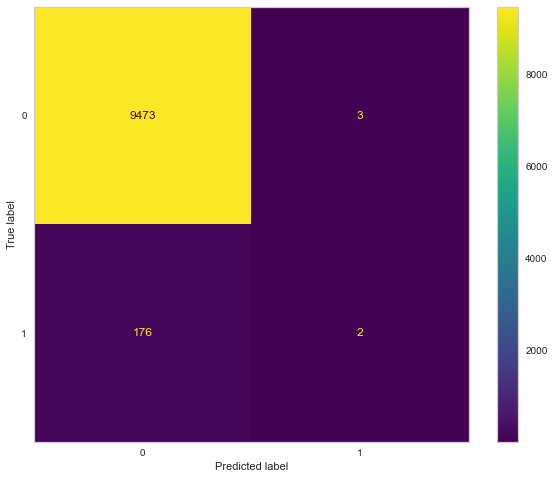

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, xgb_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

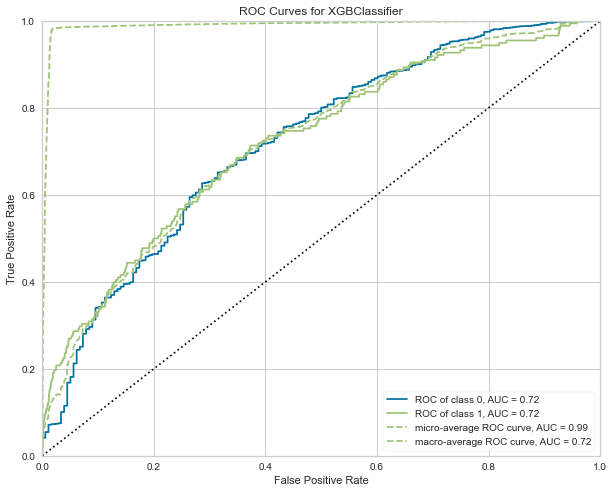

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(xgb, X_scaled, y_train, X_test_scaled, y_test)
plt.show()

**With oversampling**

In [ ]:
xgb_2 = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
xgb_2.fit(X_scaled_balanced, y_balanced)
train_score = xgb_2.score(X_scaled_balanced, y_balanced)
test_score = xgb_2.score(X_test_scaled, y_test)
xgb_pred_2 = xgb_2.predict(X_test_scaled)
print(train_score)
print(test_score)

0.9869474731936841
0.9691319660244458


In [ ]:
print(classification_report(y_test, xgb_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9476
           1       0.17      0.17      0.17       178

    accuracy                           0.97      9654
   macro avg       0.58      0.58      0.58      9654
weighted avg       0.97      0.97      0.97      9654



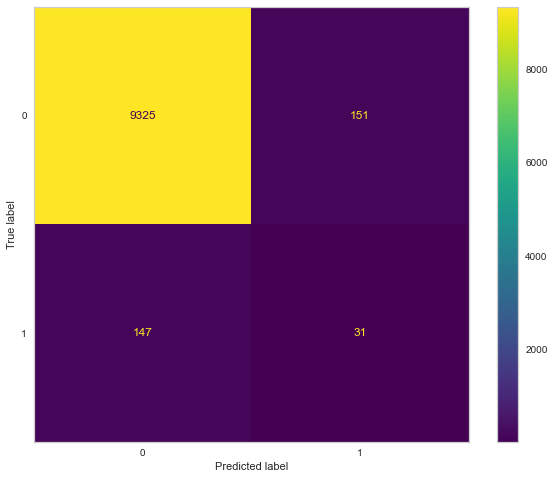

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, xgb_pred_2)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

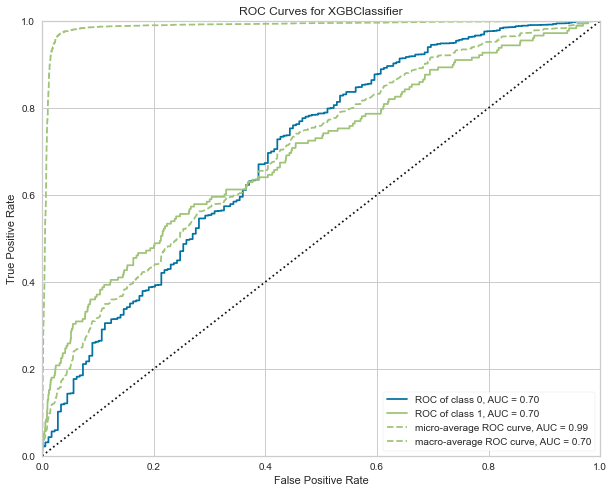

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(xgb_2, X_scaled_balanced, y_balanced, X_test_scaled, y_test)
plt.show()

### Random Forest

In [ ]:
print('Training Features Shape:', X_scaled_balanced.shape)
print('Training Labels Shape:', y_balanced.shape)

print('Testing Features Shape:', X_test_scaled.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (44206, 17)
Training Labels Shape: (44206,)
Testing Features Shape: (9654, 17)
Testing Labels Shape: (9654,)


#### With oversampling

In [ ]:
y= y_balanced.shape[0] + y_test.shape[0]
y

53860

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestClassifier(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_scaled_balanced,y_balanced)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9476
           1       0.14      0.12      0.13       178

    accuracy                           0.97      9654
   macro avg       0.56      0.55      0.56      9654
weighted avg       0.97      0.97      0.97      9654



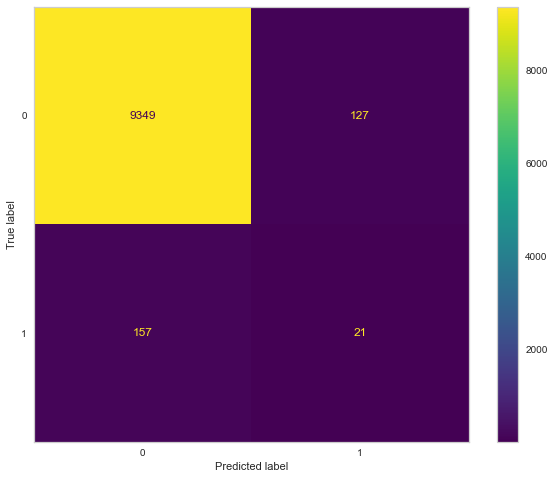

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


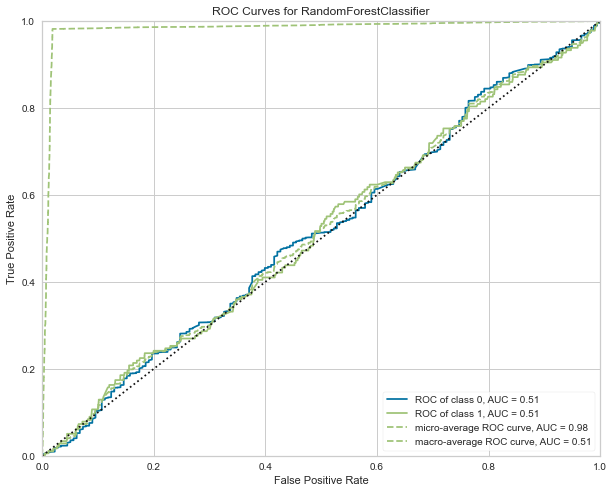

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(rf, X_balanced, y_balanced, X_test, y_test)
plt.show()

#### Without Oversampling

In [ ]:
y= y_train.shape[0] + y_test.shape[0]
y

32177

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestClassifier(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_scaled, y_train)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.00      0.00      0.00       178

    accuracy                           0.98      9654
   macro avg       0.49      0.50      0.50      9654
weighted avg       0.96      0.98      0.97      9654



C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


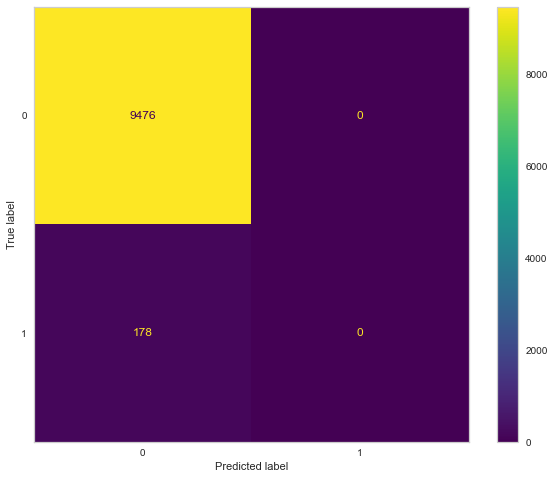

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


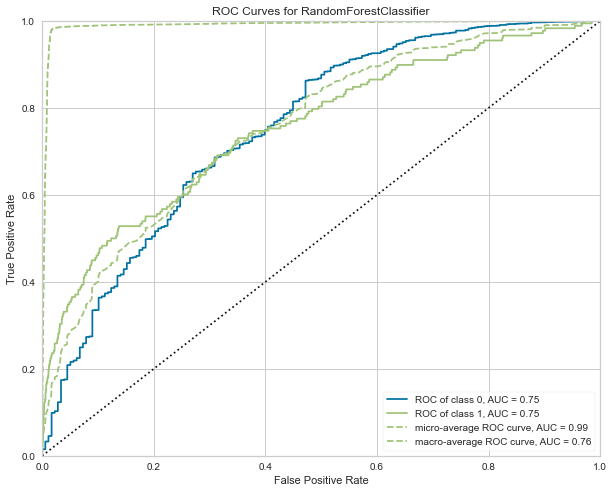

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(rf, X_scaled, y_train, X_test_scaled, y_test)
plt.show()

### Neural Network

#### With oversampling

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(123,input_dim = 17, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(42,activation='relu'))
NN_model.add(Dense(22, activation='relu'))
NN_model.add(Dense(5,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, activation='relu'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NN_model.fit(X_scaled_balanced,y_balanced, epochs=20, batch_size=5)

Epoch 1/20
8842/8842 [==============================] - 53s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/20
8842/8842 [==============================] - 49s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/20
8842/8842 [==============================] - 53s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/20
8842/8842 [==============================] - 53s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/20
8842/8842 [==============================] - 52s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/20
8842/8842 [==============================] - 50s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/20
8842/8842 [==============================] - 55s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/20
8842/8842 [==============================] - 43s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/20
8842/8842 [==============================] - 21s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/20
8842/8842 [==============================] - 21s 2ms/step - l

In [55]:
_, accuracy = NN_model.evaluate(X_test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))

302/302 [==============================] - 5s 2ms/step - loss: 0.2844 - accuracy: 0.9816
Accuracy: 98.16


In [56]:
y_pred = NN_model.predict(X_test_scaled)
y_pred_class = []
for i in y_pred.ravel():
    if i > 0.5:
        y_pred_class.append(1)
    else:
        
        y_pred_class.append(0)
y_pred_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<ipython-input-57-9f4f5e5a632f>:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = None)


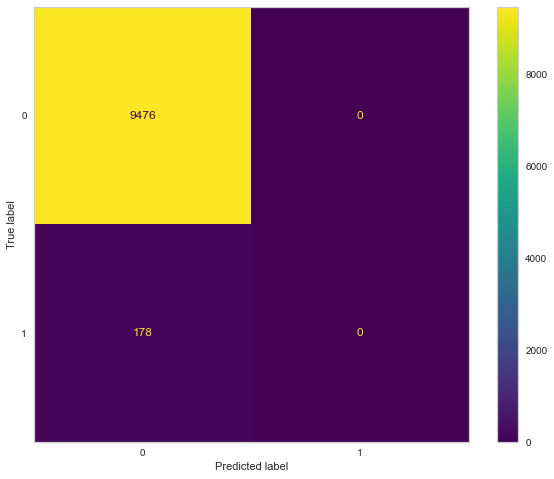

In [57]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

In [58]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.00      0.00      0.00       178

    accuracy                           0.98      9654
   macro avg       0.49      0.50      0.50      9654
weighted avg       0.96      0.98      0.97      9654



C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6020081483202984


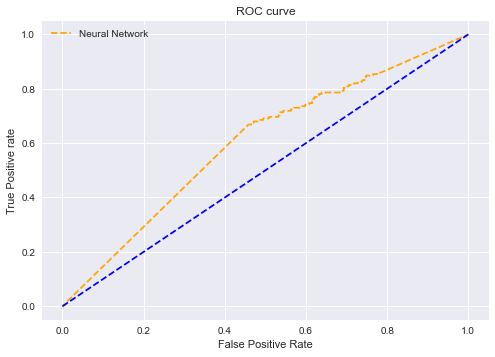

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_score1 = roc_auc_score(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(auc_score1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(nn_fpr_keras, nn_tpr_keras, linestyle='--',color='orange', label='Neural Network')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(X_test_scaled, y_pred_class)
# print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

Precision: 0.028302
Recall: 0.016854
F1 score: 0.021127


#### Without oversampling

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(123,input_dim = 17, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(42,activation='relu'))
NN_model.add(Dense(22, activation='relu'))
NN_model.add(Dense(5,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, activation='relu'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NN_model.fit(X_scaled, y_train, epochs=20, batch_size=5)


Epoch 1/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 2/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 3/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 4/20
4505/4505 [==============================] - 12s 3ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 5/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 6/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 7/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 8/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 9/20
4505/4505 [==============================] - 11s 2ms/step - loss: 0.2876 - accuracy: 0.9814
Epoch 10/20
4505/4505 [==============================] - 11s 2ms/step - l

In [60]:
# predictions = NN_model.predict(X_test_scaled)
# predictions_classes = np.argmax(predictions, axis=-1)
_, accuracy = NN_model.evaluate(X_test_scaled, y_test)
print('Accuracy: %.2f' % (accuracy*100))

302/302 [==============================] - 1s 1ms/step - loss: 0.2844 - accuracy: 0.9816
Accuracy: 98.16


In [61]:
y_pred = NN_model.predict(X_test_scaled)
y_pred_class = []
for i in y_pred.ravel():
    if i > 0.5:
        y_pred_class.append(1)
    else:
        
        y_pred_class.append(0)
y_pred_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<ipython-input-62-9f4f5e5a632f>:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = None)


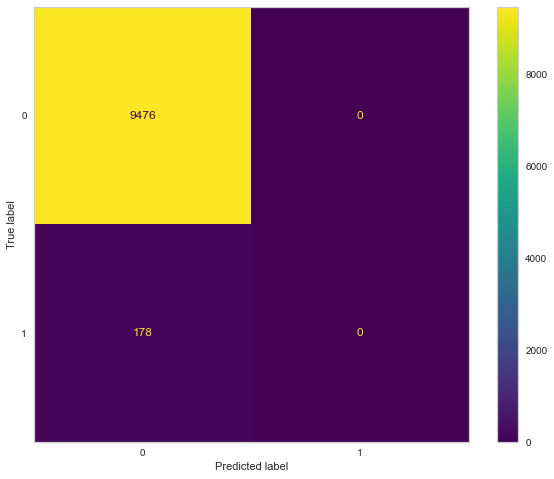

In [62]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

In [63]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.00      0.00      0.00       178

    accuracy                           0.98      9654
   macro avg       0.49      0.50      0.50      9654
weighted avg       0.96      0.98      0.97      9654



C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5


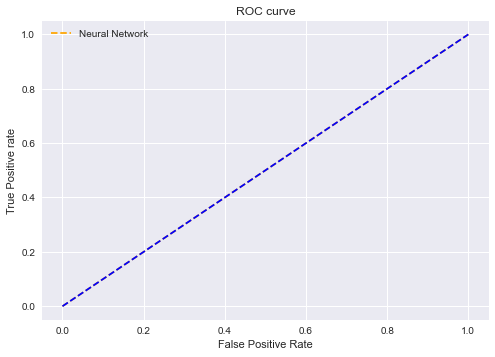

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_score1 = roc_auc_score(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(auc_score1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(nn_fpr_keras, nn_tpr_keras, linestyle='--',color='orange', label='Neural Network')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
# plt.rcParams["figure.figsize"] = (10,8)
# plot_ROC_curve(NN_model, X_balanced, y_balanced, X_test_scaled, y_test)
# plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(X_test_scaled, y_pred_class)
# print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM without oversampling

## Linear Kernel

In [ ]:
from sklearn.svm import SVC

In [ ]:
classif_lnr = SVC(kernel="linear", probability=False, random_state=42)
classif_lnr.fit(X_scaled, y_train)
svc_lnr_train_score = classif_lnr.score(X_scaled, y_train)
svc_lnr_test_score = classif_lnr.score(X_test_scaled, y_test)
svc_lnr_pred = classif_lnr.predict(X_test_scaled)

print(f"SVC w/ Linear Kernel Train Score: {svc_lnr_train_score}\n")
print(f"SVC w/ Linear Kernel Test Score: {svc_lnr_test_score}")

SVC w/ Linear Kernel Train Score: 0.981352395329219

SVC w/ Linear Kernel Test Score: 0.981562046819971


In [ ]:
print(f'Classification Report Linear Kernel SVC: \n{classification_report(y_test, svc_lnr_pred)}')

Classification Report Linear Kernel SVC: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.00      0.00      0.00       178

    accuracy                           0.98      9654
   macro avg       0.49      0.50      0.50      9654
weighted avg       0.96      0.98      0.97      9654



C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


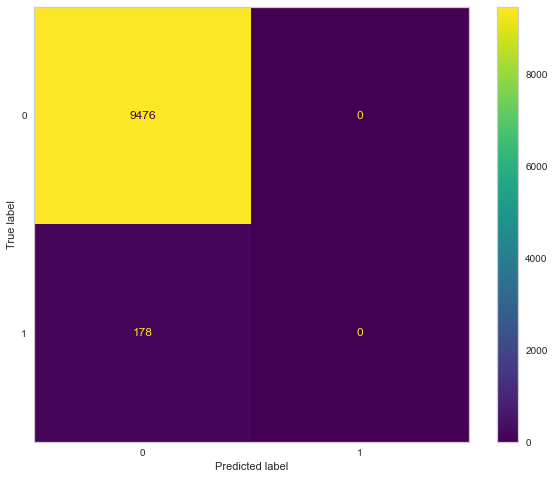

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_lnr_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


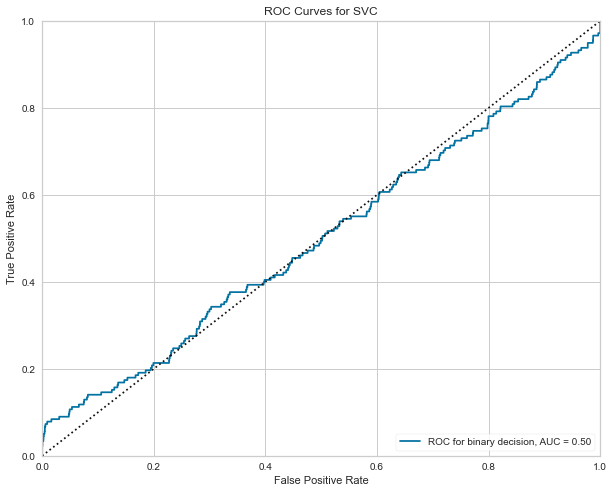

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_lnr, X_scaled, y_train, X_test_scaled, y_test)
plt.show()

## Radial Basis Function Kernel (RBF)

In [ ]:
classif_rbf = SVC(kernel="rbf", probability=False, random_state=42)
classif_rbf.fit(X_scaled, y_train)
svc_rbf_train_score = classif_rbf.score(X_scaled, y_train)
svc_rbf_test_score = classif_rbf.score(X_test_scaled, y_test)
svc_rbf_pred = classif_rbf.predict(X_test_scaled)

print(f"SVC w/ RBF Kernel Train Score: {svc_rbf_train_score}\n")
print(f"SVC w/ RBF Kernel Test Score: {svc_rbf_test_score}\n")

SVC w/ RBF Kernel Train Score: 0.981352395329219

SVC w/ RBF Kernel Test Score: 0.981562046819971



In [ ]:
print(f'Classification Report RBF Kernel SVC: \n{classification_report(y_test, svc_rbf_pred)}')

Classification Report RBF Kernel SVC: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.00      0.00      0.00       178

    accuracy                           0.98      9654
   macro avg       0.49      0.50      0.50      9654
weighted avg       0.96      0.98      0.97      9654



C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


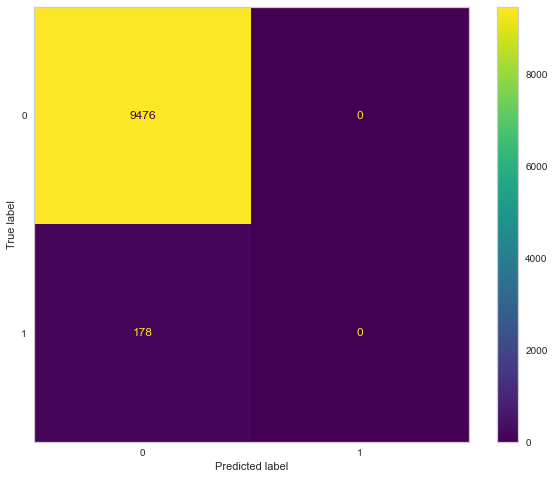

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_rbf_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


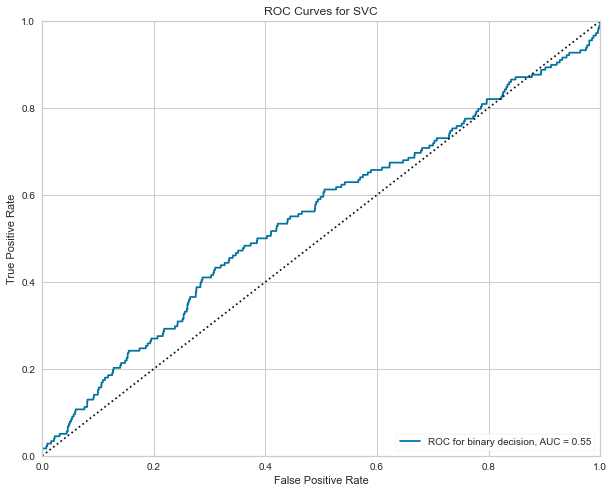

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_rbf, X_scaled, y_train, X_test_scaled, y_test)
plt.show()

## SVM with oversampling

#### Linear Kernel

In [ ]:
classif_lnr_sm = SVC(kernel="linear", probability=False, random_state=42)
classif_lnr_sm.fit(X_scaled_balanced, y_balanced)
svc_lnr_train_score_sm = classif_lnr_sm.score(X_scaled_balanced, y_balanced)
svc_lnr_test_score_sm = classif_lnr_sm.score(X_test_scaled, y_test)
svc_lnr_pred_sm = classif_lnr_sm.predict(X_test_scaled)

print(f"SVC w/ Linear Kernel Train Score: {svc_lnr_train_score_sm}\n")
print(f"SVC w/ Linear Kernel Test Score: {svc_lnr_test_score_sm}")

SVC w/ Linear Kernel Train Score: 0.7669320906664254

SVC w/ Linear Kernel Test Score: 0.8936192251916304


In [ ]:
print(f'Classification Report Linear Kernel SVC with oversampling: \n{classification_report(y_test, svc_lnr_pred_sm)}')

Classification Report Linear Kernel SVC with oversampling: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      9476
           1       0.03      0.17      0.06       178

    accuracy                           0.89      9654
   macro avg       0.51      0.54      0.50      9654
weighted avg       0.97      0.89      0.93      9654



C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


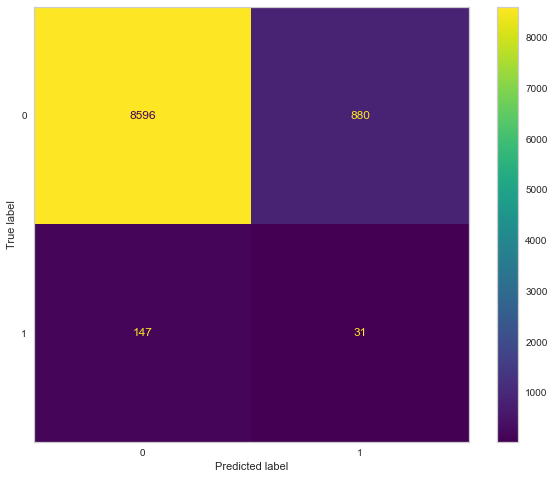

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_lnr_pred_sm)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


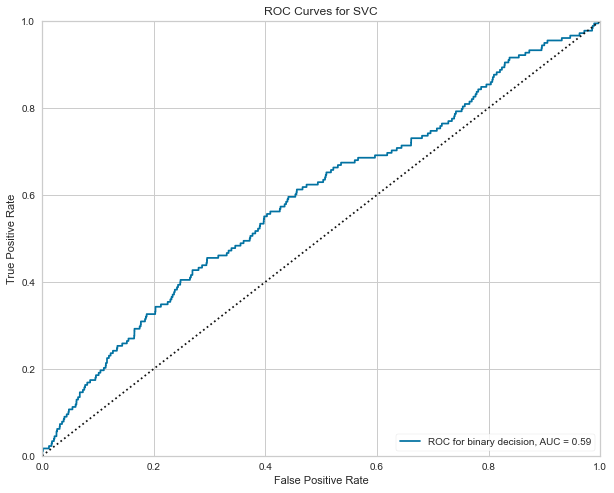

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_lnr_sm, X_scaled_balanced, y_balanced, X_test_scaled, y_test)
plt.show()

#### RBF Kernel

In [ ]:
classif_rbf_sm = SVC(kernel="rbf", probability=False, random_state=42)
classif_rbf_sm.fit(X_scaled_balanced, y_balanced)
svc_rbf_train_score_sm = classif_rbf.score(X_scaled_balanced, y_balanced)
svc_rbf_test_score_sm = classif_rbf.score(X_test_scaled, y_test)
svc_rbf_pred_sm = classif_rbf_sm.predict(X_test_scaled)

print(f"SVC w/ RBF Kernel Train Score: {svc_rbf_train_score_sm}\n")
print(f"SVC w/ RBF Kernel Test Score: {svc_rbf_test_score_sm}\n")

SVC w/ RBF Kernel Train Score: 0.5

SVC w/ RBF Kernel Test Score: 0.981562046819971



In [ ]:
print(f'Classification Report RBF Kernel SVC: \n{classification_report(y_test, svc_rbf_pred_sm)}')

Classification Report RBF Kernel SVC: 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9476
           1       0.03      0.23      0.05       178

    accuracy                           0.84      9654
   macro avg       0.51      0.54      0.48      9654
weighted avg       0.97      0.84      0.89      9654



C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


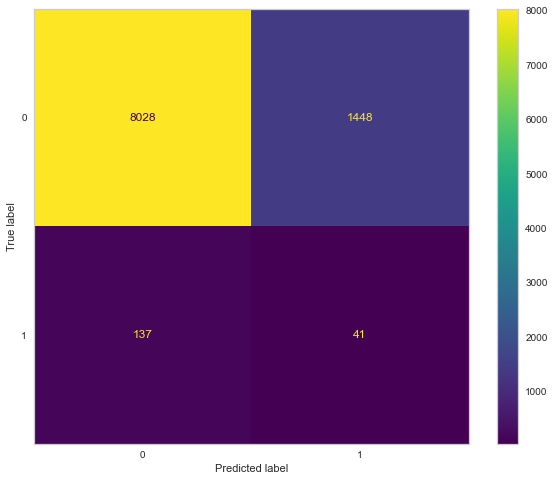

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_rbf_pred_sm)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


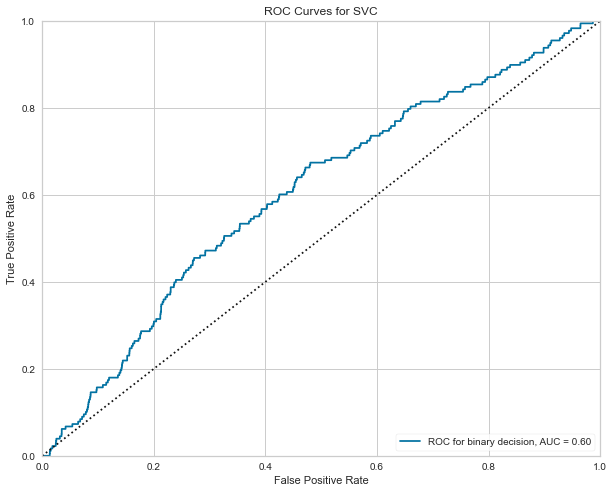

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_rbf_sm, X_scaled_balanced, y_balanced, X_test_scaled, y_test)
plt.show()

# Decision Tree

**Without Oversampling**

In [ ]:
from sklearn import tree

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=7, criterion="entropy", min_samples_leaf=2)
dt.fit(X_scaled, y_train)

dt_pred = dt.predict(X_test_scaled)

#Accuracy score
print(f"Accuracy train:  {round(dt.score(X_scaled, y_train), 4)}")
print(f"Accuracy test:  {round(dt.score(X_test_scaled, y_test),4 )}")

Accuracy train:  0.9818
Accuracy test:  0.9816


In [ ]:
print(f'Classification Report Decision Tree: \n{classification_report(y_test, dt_pred)}')

Classification Report Decision Tree: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.50      0.02      0.03       178

    accuracy                           0.98      9654
   macro avg       0.74      0.51      0.51      9654
weighted avg       0.97      0.98      0.97      9654



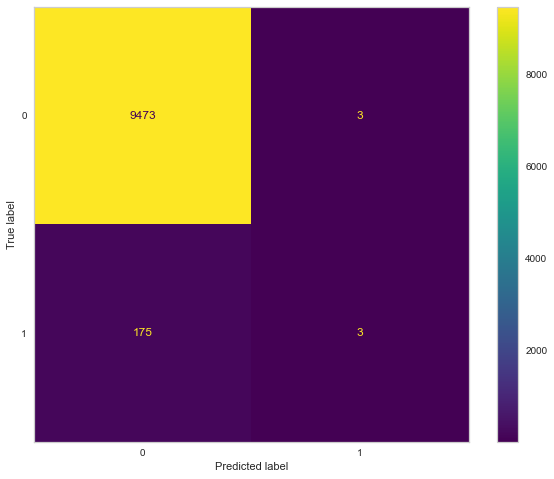

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


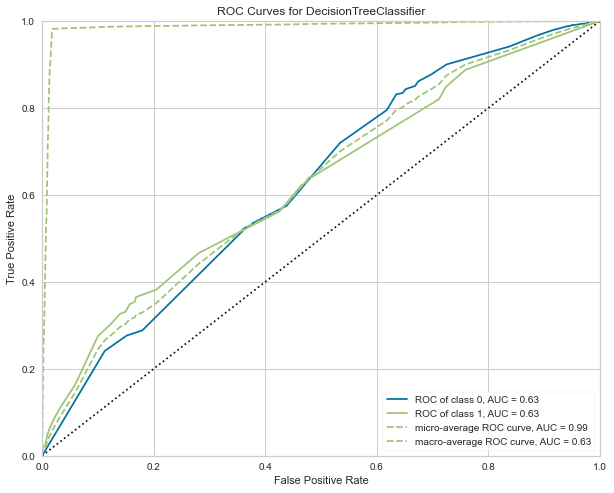

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(dt, X_scaled, y_train, X_test_scaled, y_test)
plt.show()

**With oversampling**

In [ ]:
dt2 = tree.DecisionTreeClassifier(max_depth=7, criterion="entropy", min_samples_leaf=2)
dt2.fit(X_scaled_balanced, y_balanced)

dt_pred2=dt2.predict(X_test_scaled)

#Accuracy score
print(f"Accuracy train:  {round(dt2.score(X_scaled_balanced, y_balanced), 4)}")
print(f"Accuracy test:  {round(dt2.score(X_test_scaled, y_test),4 )}")

Accuracy train:  0.8132
Accuracy test:  0.8035


In [ ]:
print(f'Classification Report Decision Tree: \n{classification_report(y_test, dt_pred2)}')

Classification Report Decision Tree: 
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      9476
           1       0.03      0.29      0.05       178

    accuracy                           0.80      9654
   macro avg       0.51      0.55      0.47      9654
weighted avg       0.97      0.80      0.87      9654



C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


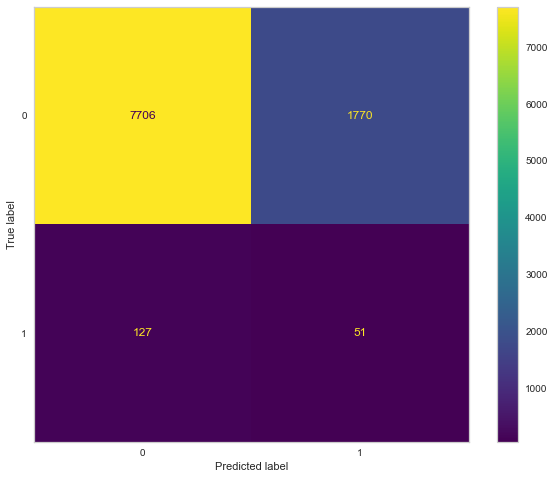

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, dt_pred2)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


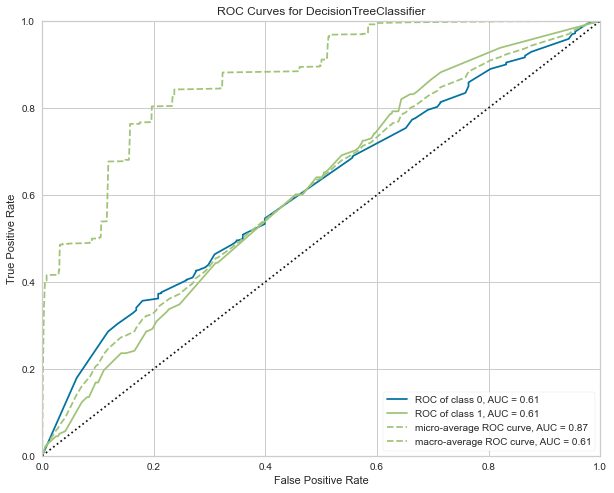

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(dt2, X_scaled_balanced, y_balanced, X_test_scaled, y_test)
plt.show()

# Logistic Regression

**Without oversampling**

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

print(f"Accuracy train:  T2: {round(lr.score(X_scaled, y_train), 4)}")
print(f"Accuracy test: T2: {round(lr.score(X_test_scaled, y_test),4 )}")

Accuracy train:  T2: 0.9814
Accuracy test: T2: 0.9816


C:\Users\Sherman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f'Classification Report Logistic Regression: \n{classification_report(y_test, lr_pred)}')

Classification Report Logistic Regression: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9476
           1       0.00      0.00      0.00       178

    accuracy                           0.98      9654
   macro avg       0.49      0.50      0.50      9654
weighted avg       0.96      0.98      0.97      9654



C:\Users\Sherman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sherman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sherman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


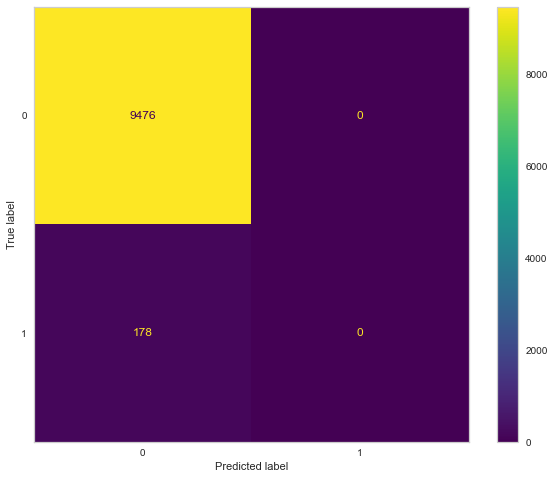

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, lr_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\Sherman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


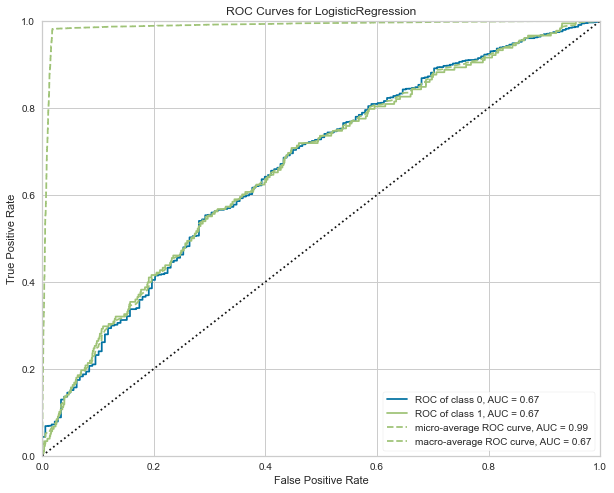

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(lr, X_scaled, y_train, X_test_scaled, y_test)
plt.show()

**With oversampling**

In [ ]:
lr2 = LogisticRegression(random_state=0).fit(X_scaled_balanced, y_balanced)
lr_pred2 = lr.predict(X_test_scaled)

print(f"Accuracy train:  T2: {round(lr.score(X_scaled_balanced, y_balanced), 4)}")
print(f"Accuracy test: T2: {round(lr.score(X_test_scaled, y_test),4 )}")

Accuracy train:  T2: 0.7666
Accuracy test: T2: 0.8505


C:\Users\Sherman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f'Classification Report Logistic Regression: \n{classification_report(y_test, lr_pred2)}')

Classification Report Logistic Regression: 
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9476
           1       0.03      0.25      0.06       178

    accuracy                           0.85      9654
   macro avg       0.51      0.55      0.49      9654
weighted avg       0.97      0.85      0.90      9654



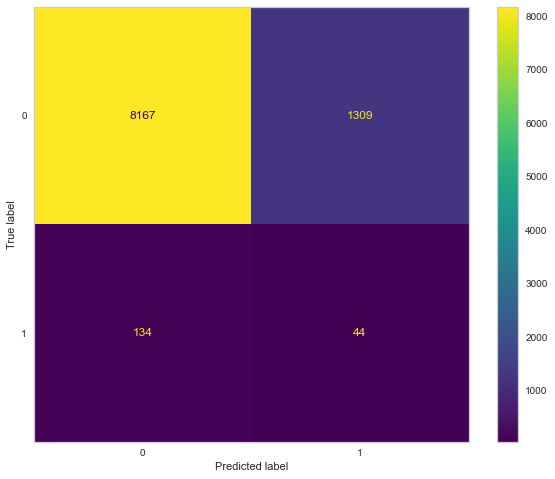

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, lr_pred2)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\Sherman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


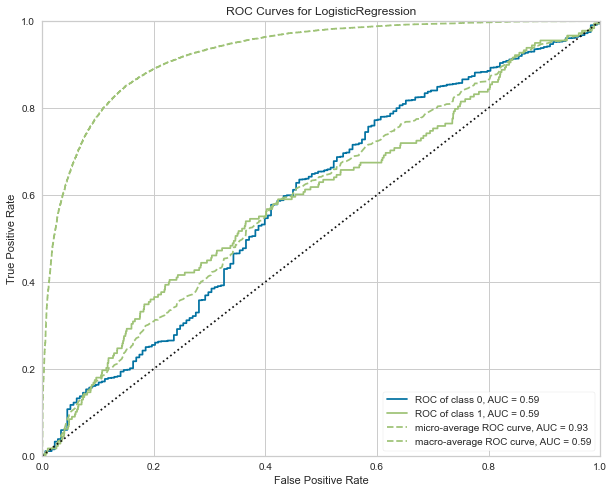

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(lr2, X_scaled_balanced, y_balanced, X_test_scaled, y_test)
plt.show()

# Calculation of WOE and IV

In [110]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        #for numeric/float columns use pd.qcut to bin
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            col_name = ivars + '_bin'
            merged[col_name] = binned_x
            #save the qcut bins and the 'BAD' column in d0
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
#             print(d0)
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
#             print(d0)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
#         print(d)
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
#         print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        #find the IV for each variable and add it to the newDF in each iteration. This is the IV df
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
            
    return newDF, woeDF

In [210]:
iv_df, woe_df = iv_woe(merged, "target")
iv_df.sort_values(by='IV', ascending=False)

Variable        IV
0   CUST_FOR_MONTHS_bin  0.292443
0       CUST_FOR_MONTHS  0.292443
0       OCCUPATION_TYPE  0.054544
0             EMP_YEARS  0.045806
0         EMP_YEARS_bin  0.045806
0               AGE_bin  0.036072
0                   AGE  0.036072
0    NAME_FAMILY_STATUS  0.031572
0       FLAG_OWN_REALTY  0.030487
0       CNT_FAM_MEMBERS  0.022100
0      AMT_INCOME_TOTAL  0.018794
0  AMT_INCOME_TOTAL_bin  0.018794
0      NAME_INCOME_TYPE  0.017823
0     NAME_HOUSING_TYPE  0.016678
0          CNT_CHILDREN  0.012763
0           CODE_GENDER  0.011588
0   NAME_EDUCATION_TYPE  0.008583
0          FLAG_OWN_CAR  0.002292
0       FLAG_WORK_PHONE  0.002058
0            FLAG_EMAIL  0.000530
0            FLAG_PHONE  0.000168

In [211]:
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 9
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Variable         149 non-null    object 
 1   Cutoff           149 non-null    object 
 2   N                149 non-null    int64  
 3   Events           149 non-null    int64  
 4   % of Events      149 non-null    float64
 5   Non-Events       149 non-null    int64  
 6   % of Non-Events  149 non-null    float64
 7   WoE              149 non-null    float64
 8   IV               149 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 11.6+ KB


In [275]:
# using decision tree to identify feature importance to cross check with IV values
# need to confirm if decision tree should be built on original / balanced dataset

from sklearn import tree

DTree = tree.DecisionTreeClassifier()
DTree.fit(X, y)
feature_importances = DTree.feature_importances_

importance_dict = dict()

X_columns = X.columns

for i in range(len(X_columns)):
    current_column = X_columns[i]
    importance_dict[current_column] = feature_importances[i]
    
sorted_importance = dict(sorted(importance_dict.items(), key = lambda x: x[1], reverse=True))
sorted_importance

{'AGE': 0.24893053977592236,
 'CUST_FOR_MONTHS': 0.21971896146157452,
 'EMP_YEARS': 0.1619660911914372,
 'AMT_INCOME_TOTAL': 0.1027706534438148,
 'OCCUPATION_TYPE_ENCODED': 0.04376241424193004,
 'NAME_INCOME_TYPE_ENCODED': 0.03073464276386154,
 'CNT_FAM_MEMBERS': 0.029255168996711708,
 'NAME_FAMILY_STATUS_ENCODED': 0.02415494112396824,
 'FLAG_OWN_REALTY': 0.02411900760259064,
 'NAME_EDUCATION_TYPE_ENCODED': 0.02147657367815006,
 'CNT_CHILDREN': 0.020412892330652146,
 'NAME_HOUSING_TYPE_ENCODED': 0.016693377770192794,
 'FLAG_PHONE': 0.014888546199235285,
 'CODE_GENDER': 0.014243689097950126,
 'FLAG_OWN_CAR': 0.012227531267255452,
 'FLAG_WORK_PHONE': 0.009581550350027201,
 'FLAG_EMAIL': 0.005063418704725999}

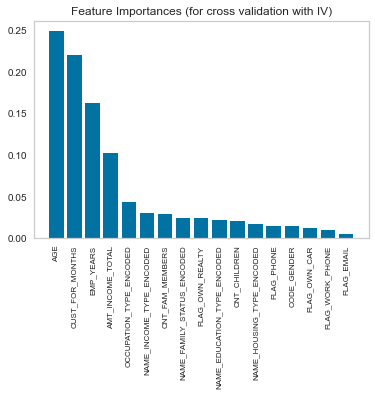

In [276]:
sorted_names, sorted_values = [], []

for sorted_name in sorted_importance:
    sorted_names.append(sorted_name)
    sorted_values.append(sorted_importance[sorted_name])
    
plt.bar(range(len(sorted_names)), sorted_values)
plt.xticks(range(len(sorted_names)), sorted_names, rotation="vertical", fontsize = 8)
plt.title("Feature Importances (for cross validation with IV)")
plt.grid(False)
plt.show()

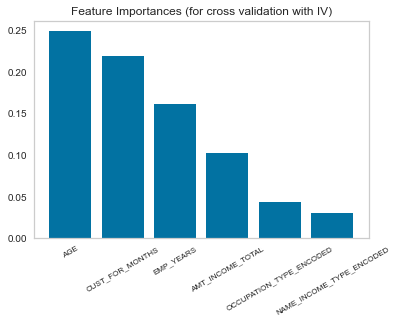

In [277]:
plt.bar(range(len(sorted_names[:6])), sorted_values[:6])
plt.xticks(range(len(sorted_names[:6])), sorted_names[:6], rotation=30, fontsize = 8)
plt.title("Feature Importances (for cross validation with IV)")
plt.grid(False)
plt.show()

### Binary Variables

In [141]:
CODE_GENDER_df = woe_df.loc[woe_df["Variable"] == "CODE_GENDER"]
CODE_GENDER_df

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  CODE_GENDER      0  10642     228     0.381271       10414   
1  CODE_GENDER      1  21535     370     0.618729       21165   

   % of Non-Events       WoE        IV  
0         0.329776 -0.145096  0.007472  
1         0.670224  0.079944  0.004117

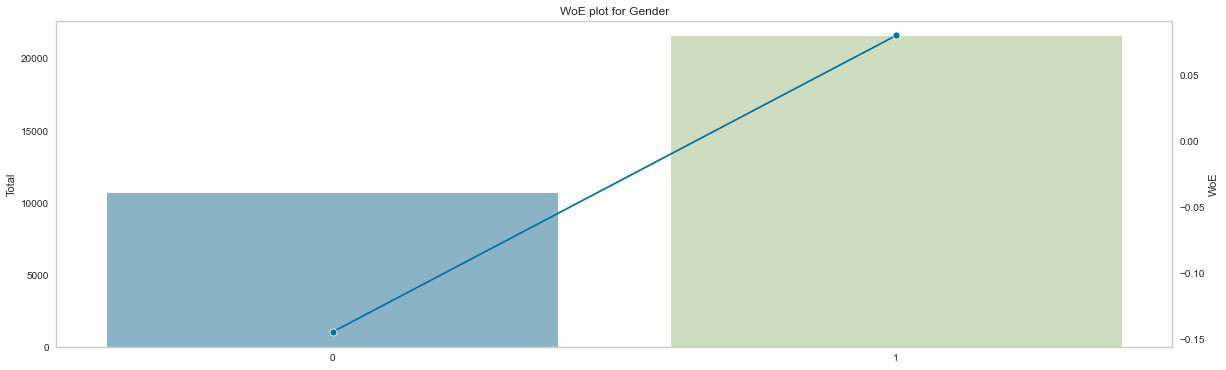

In [250]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = CODE_GENDER_df.index , y = CODE_GENDER_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = CODE_GENDER_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Gender")
plt.show()

In [146]:
FLAG_OWN_CAR_df = woe_df.loc[woe_df["Variable"] == "FLAG_OWN_CAR"]
FLAG_OWN_CAR_df

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  FLAG_OWN_CAR      0  19987     385     0.643813       19602   
1  FLAG_OWN_CAR      1  12190     213     0.356187       11977   

   % of Non-Events       WoE        IV  
0         0.620729 -0.036513  0.000843  
1         0.379271  0.062794  0.001450

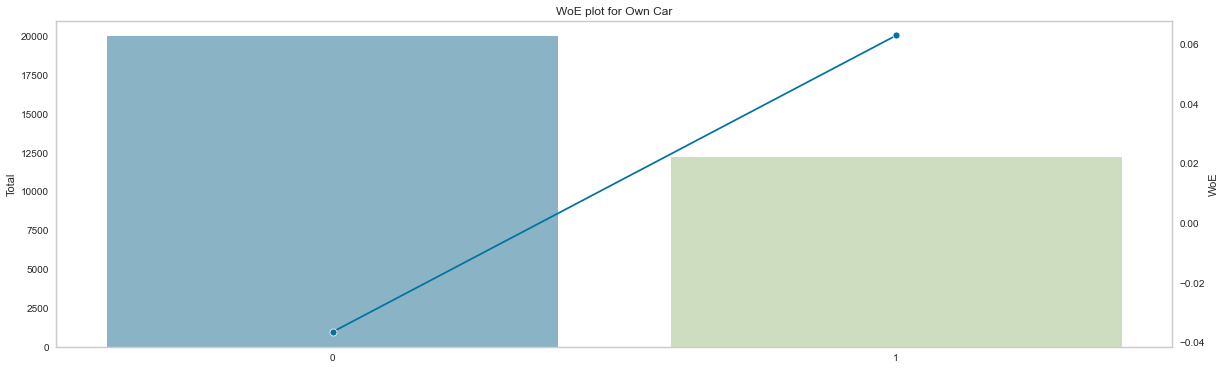

In [251]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = FLAG_OWN_CAR_df.Cutoff , y = FLAG_OWN_CAR_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = FLAG_OWN_CAR_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Own Car")
plt.show()

In [150]:
FLAG_OWN_REALTY_df = woe_df.loc[woe_df["Variable"] == "FLAG_OWN_REALTY"]
FLAG_OWN_REALTY_df

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  FLAG_OWN_REALTY      0  10580     246     0.411371       10334   
1  FLAG_OWN_REALTY      1  21597     352     0.588629       21245   

   % of Non-Events       WoE        IV  
0         0.327243 -0.228794  0.019248  
1         0.672757  0.133589  0.011239

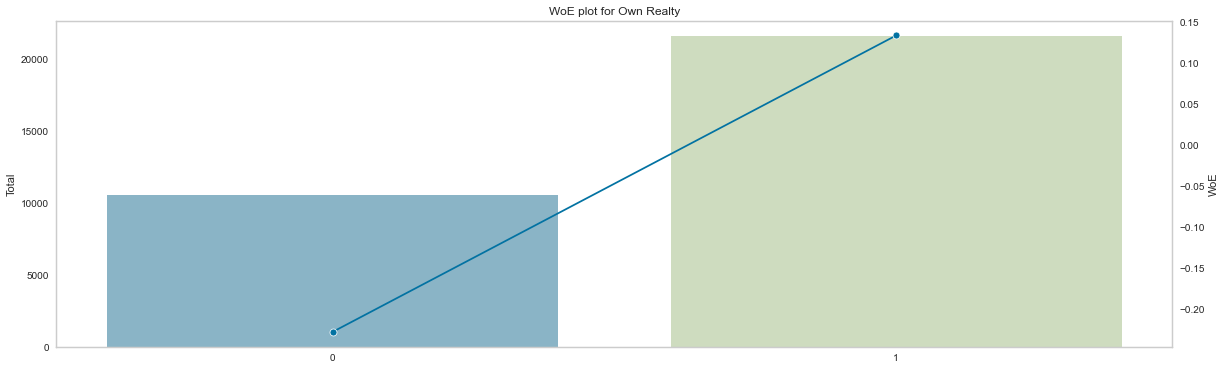

In [252]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = FLAG_OWN_REALTY_df.Cutoff , y = FLAG_OWN_REALTY_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = FLAG_OWN_REALTY_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Own Realty")
plt.show()

In [153]:
FLAG_WORK_PHONE_df = woe_df.loc[woe_df["Variable"] == "FLAG_WORK_PHONE"]
FLAG_WORK_PHONE_df

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  FLAG_WORK_PHONE      0  24928     452     0.755853       24476   
1  FLAG_WORK_PHONE      1   7249     146     0.244147        7103   

   % of Non-Events       WoE        IV  
0         0.775072  0.025109  0.000483  
1         0.224928 -0.081991  0.001576

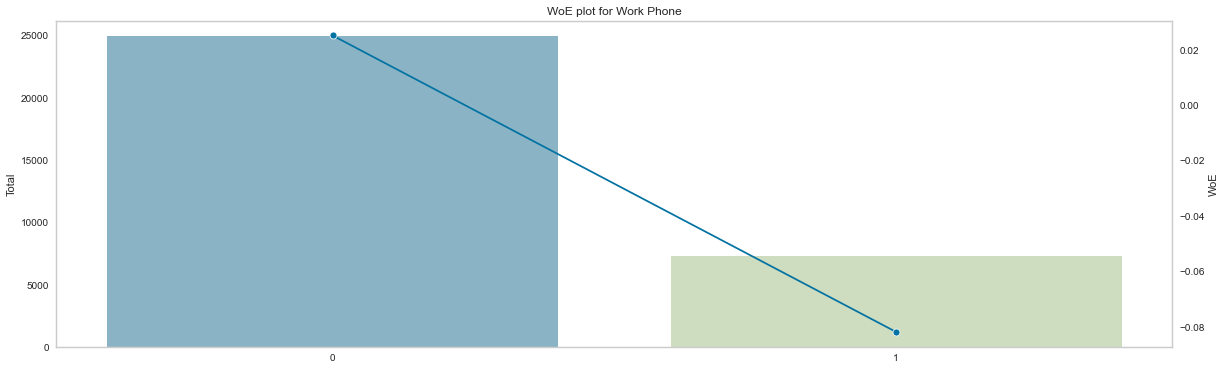

In [253]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = FLAG_WORK_PHONE_df.Cutoff , y = FLAG_WORK_PHONE_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = FLAG_WORK_PHONE_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Work Phone")
plt.show()

In [156]:
FLAG_PHONE_df = woe_df.loc[woe_df["Variable"] == "FLAG_PHONE"]
FLAG_PHONE_df

Variable Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0  FLAG_PHONE      0  22679     418     0.698997       22261          0.70493   
1  FLAG_PHONE      1   9498     180     0.301003        9318          0.29507   

        WoE        IV  
0  0.008453  0.000050  
1 -0.019910  0.000118

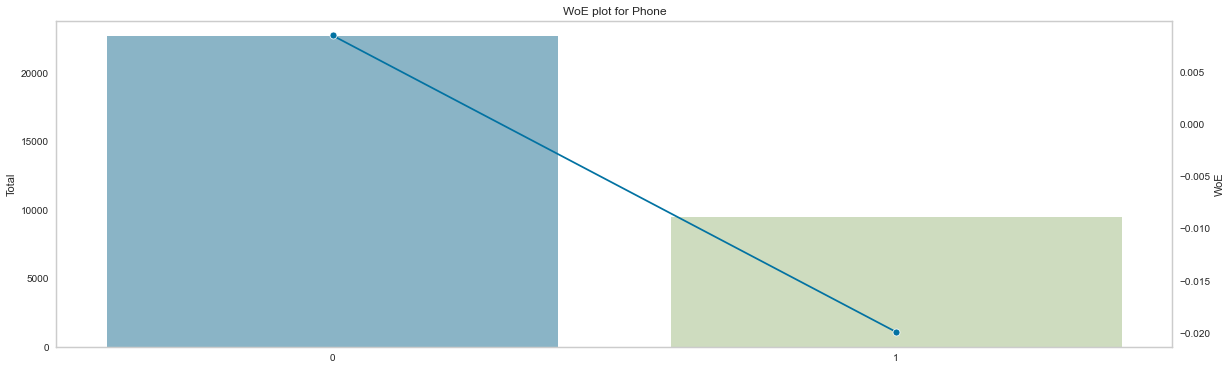

In [254]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = FLAG_PHONE_df.Cutoff , y = FLAG_PHONE_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = FLAG_PHONE_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Phone")
plt.show()

In [158]:
FLAG_EMAIL_df = woe_df.loc[woe_df["Variable"] == "FLAG_EMAIL"]
FLAG_EMAIL_df

Variable Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0  FLAG_EMAIL      0  29282     548     0.916388       28734         0.909908   
1  FLAG_EMAIL      1   2895      50     0.083612        2845         0.090092   

        WoE        IV  
0 -0.007096  0.000046  
1  0.074638  0.000484

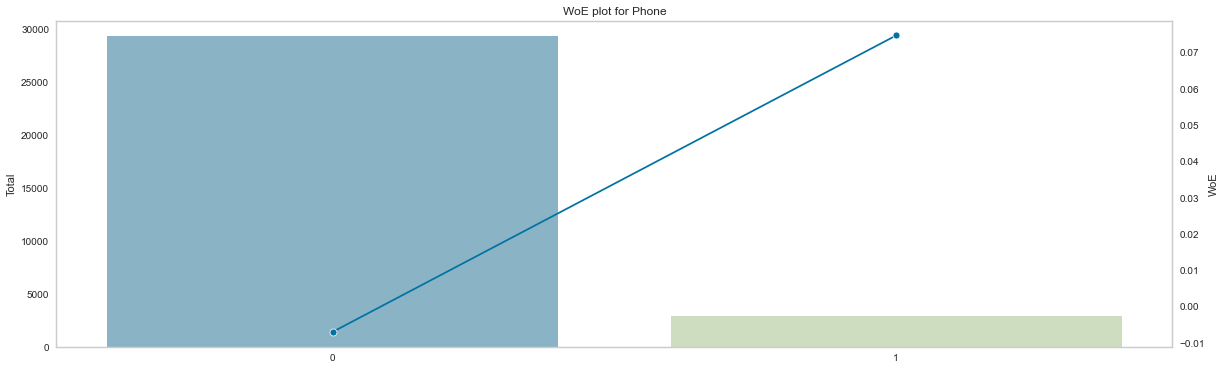

In [255]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = FLAG_EMAIL_df.Cutoff , y = FLAG_EMAIL_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = FLAG_EMAIL_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Phone")
plt.show()

### Categorical Variables

In [160]:
NAME_INCOME_TYPE_df = woe_df.loc[woe_df["Variable"] == "NAME_INCOME_TYPE"]
NAME_INCOME_TYPE_df

Variable                Cutoff      N  Events  % of Events  \
0  NAME_INCOME_TYPE  Commercial associate   7492     139     0.232441   
1  NAME_INCOME_TYPE             Pensioner   5478     128     0.214047   
2  NAME_INCOME_TYPE         State servant   2633      37     0.061873   
3  NAME_INCOME_TYPE               Student     10       0     0.000836   
4  NAME_INCOME_TYPE               Working  16564     294     0.491639   

   Non-Events  % of Non-Events       WoE            IV  
0        7353         0.232845  0.001733  6.985904e-07  
1        5350         0.169416 -0.233835  1.043617e-02  
2        2596         0.082207  0.284152  5.777845e-03  
3          10         0.000317 -0.970925  5.043509e-04  
4       16270         0.515216  0.046842  1.104384e-03

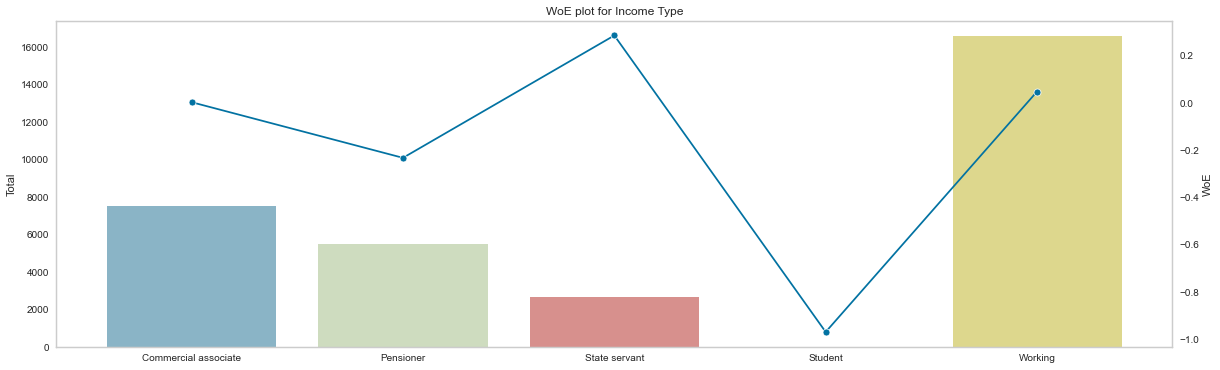

In [256]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = NAME_INCOME_TYPE_df.Cutoff , y = NAME_INCOME_TYPE_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = NAME_INCOME_TYPE_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Income Type")
plt.show()

In [182]:
NAME_EDUCATION_TYPE_df = woe_df.loc[woe_df["Variable"] == "NAME_EDUCATION_TYPE"]
NAME_EDUCATION_TYPE_df

Variable                         Cutoff      N  Events  \
0  NAME_EDUCATION_TYPE                Academic degree     25       0   
1  NAME_EDUCATION_TYPE               Higher education   8670     167   
2  NAME_EDUCATION_TYPE              Incomplete higher   1251      31   
3  NAME_EDUCATION_TYPE                Lower secondary    336      10   
4  NAME_EDUCATION_TYPE  Secondary / secondary special  21895     390   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.000836          25         0.000792 -0.054634  0.000002  
1     0.279264        8503         0.269261 -0.036476  0.000365  
2     0.051839        1220         0.038633 -0.294038  0.003883  
3     0.016722         326         0.010323 -0.482345  0.003087  
4     0.652174       21505         0.680991  0.043237  0.001246

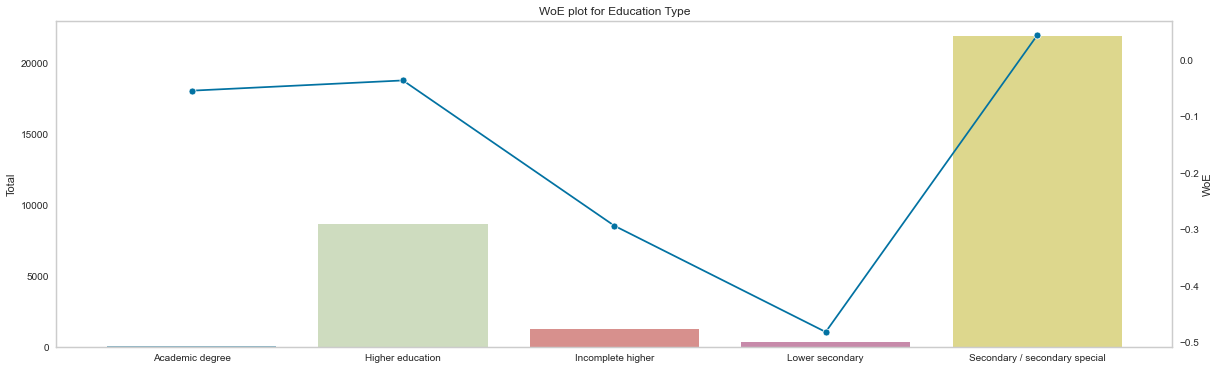

In [257]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = NAME_EDUCATION_TYPE_df.Cutoff , y = NAME_EDUCATION_TYPE_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = NAME_EDUCATION_TYPE_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Education Type")
plt.show()

In [185]:
NAME_FAMILY_STATUS_df = woe_df.loc[woe_df["Variable"] == "NAME_FAMILY_STATUS"]
NAME_FAMILY_STATUS_df

Variable                Cutoff      N  Events  % of Events  \
0  NAME_FAMILY_STATUS        Civil marriage   2620      45     0.075251   
1  NAME_FAMILY_STATUS               Married  22085     380     0.635452   
2  NAME_FAMILY_STATUS             Separated   1857      30     0.050167   
3  NAME_FAMILY_STATUS  Single / not married   4254      99     0.165552   
4  NAME_FAMILY_STATUS                 Widow   1361      44     0.073579   

   Non-Events  % of Non-Events       WoE        IV  
0        2575         0.081542  0.080285  0.000505  
1       21705         0.687324  0.078470  0.004070  
2        1827         0.057855  0.142576  0.001096  
3        4155         0.131575 -0.229709  0.007805  
4        1317         0.041705 -0.567735  0.018096

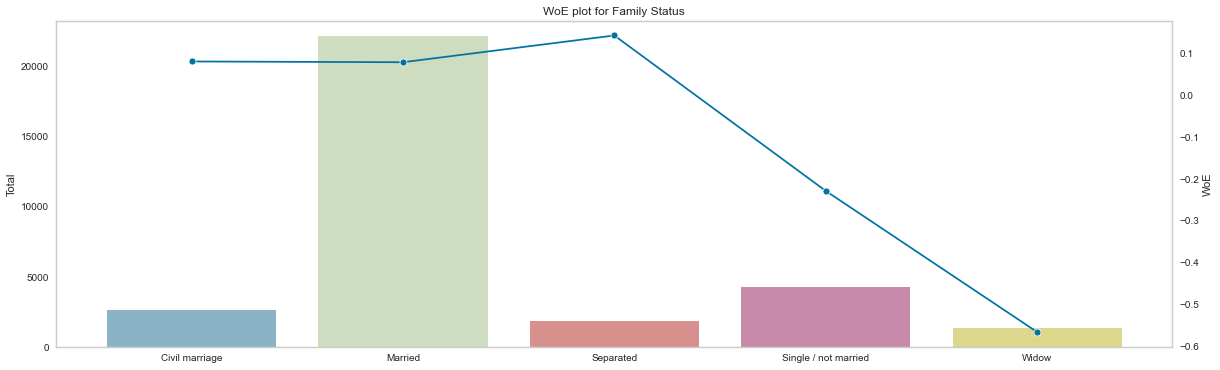

In [258]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = NAME_FAMILY_STATUS_df.Cutoff , y = NAME_FAMILY_STATUS_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = NAME_FAMILY_STATUS_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Family Status")
plt.show()

In [189]:
NAME_HOUSING_TYPE_df = woe_df.loc[woe_df["Variable"] == "NAME_HOUSING_TYPE"]
NAME_HOUSING_TYPE_df

Variable               Cutoff      N  Events  % of Events  \
0  NAME_HOUSING_TYPE      Co-op apartment    137       3     0.005017   
1  NAME_HOUSING_TYPE    House / apartment  28723     522     0.872910   
2  NAME_HOUSING_TYPE  Municipal apartment   1015      30     0.050167   
3  NAME_HOUSING_TYPE     Office apartment    231       9     0.015050   
4  NAME_HOUSING_TYPE     Rented apartment    492       8     0.013378   
5  NAME_HOUSING_TYPE         With parents   1579      26     0.043478   

   Non-Events  % of Non-Events       WoE        IV  
0         134         0.004243 -0.167429  0.000129  
1       28201         0.893030  0.022788  0.000459  
2         985         0.031192 -0.475213  0.009017  
3         222         0.007030 -0.761204  0.006105  
4         484         0.015327  0.135986  0.000265  
5        1553         0.049178  0.123190  0.000702

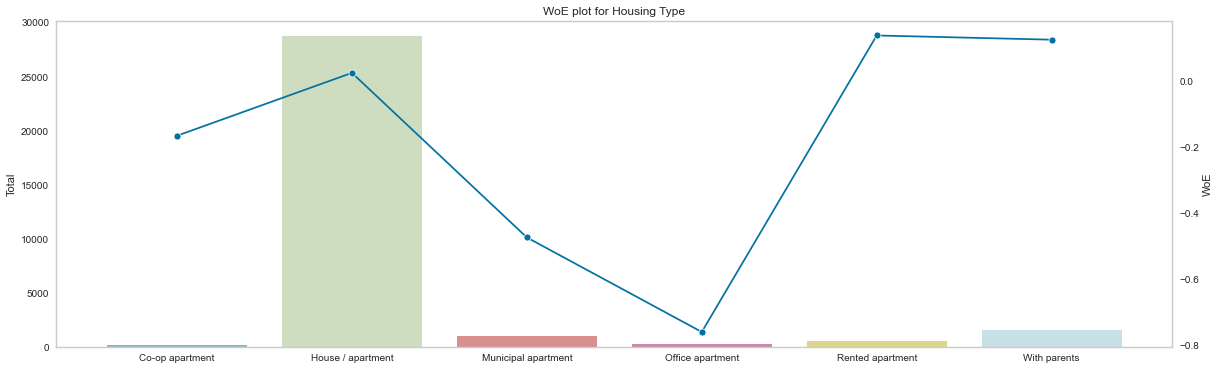

In [259]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = NAME_HOUSING_TYPE_df.Cutoff , y = NAME_HOUSING_TYPE_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = NAME_HOUSING_TYPE_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Housing Type")
plt.show()

In [191]:
OCCUPATION_TYPE_df = woe_df.loc[woe_df["Variable"] == "OCCUPATION_TYPE"]
OCCUPATION_TYPE_df

Variable                 Cutoff     N  Events  % of Events  \
0   OCCUPATION_TYPE            Accountants  1082      22     0.036789   
1   OCCUPATION_TYPE         Cleaning staff   493       5     0.008361   
2   OCCUPATION_TYPE          Cooking staff   586       9     0.015050   
3   OCCUPATION_TYPE             Core staff  3185      72     0.120401   
4   OCCUPATION_TYPE                Drivers  1931      43     0.071906   
5   OCCUPATION_TYPE               HR staff    77       1     0.001672   
6   OCCUPATION_TYPE  High skill tech staff  1229      29     0.048495   
7   OCCUPATION_TYPE               IT staff    55       3     0.005017   
8   OCCUPATION_TYPE               Laborers  5460      96     0.160535   
9   OCCUPATION_TYPE     Low-skill Laborers   150       8     0.013378   
10  OCCUPATION_TYPE               Managers  2629      47     0.078595   
11  OCCUPATION_TYPE         Medicine staff  1074      10     0.016722   
12  OCCUPATION_TYPE  Private service staff   296       2     0.003344   
13  OCCUPATION_TYPE          Realty agents    67       0     0.000836   
14  OCCUPATION_TYPE            Sales staff  3062      45     0.075251   
15  OCCUPATION_TYPE            Secretaries   134       2     0.003344   
16  OCCUPATION_TYPE         Security staff   530      12     0.020067   
17  OCCUPATION_TYPE             Unemployed  9980     190     0.317726   
18  OCCUPATION_TYPE   Waiters/barmen staff   157       2     0.003344   

    Non-Events  % of Non-Events       WoE        IV  
0         1060         0.033567 -0.091675  0.000295  
1          488         0.015453  0.614221  0.004356  
2          577         0.018272  0.193961  0.000625  
3         3113         0.098578 -0.199981  0.004364  
4         1888         0.059787 -0.184584  0.002237  
5           76         0.002407  0.364076  0.000267  
6         1200         0.038000 -0.243876  0.002559  
7           52         0.001647 -1.114025  0.003754  
8         5364         0.169860  0.056460  0.000526  
9          142         0.004497 -1.090271  0.009683  
10        2582         0.081763  0.039515  0.000125  
11        1064         0.033693  0.700549  0.011889  
12         294         0.009310  1.023776  0.006107  
13          67         0.002122  0.931183  0.001197  
14        3017         0.095538  0.238699  0.004843  
15         132         0.004180  0.222998  0.000186  
16         518         0.016403 -0.201588  0.000739  
17        9790         0.310016 -0.024564  0.000189  
18         155         0.004908  0.383621  0.000600

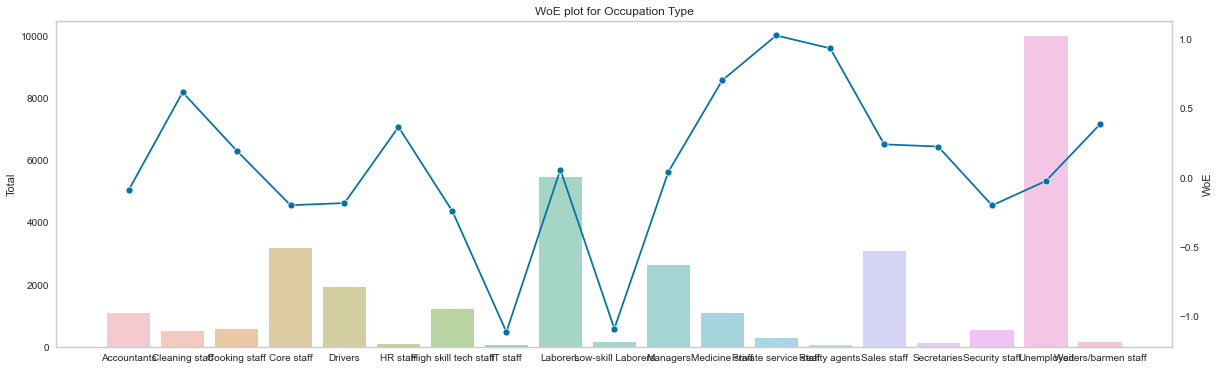

In [260]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = OCCUPATION_TYPE_df.Cutoff , y = OCCUPATION_TYPE_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = OCCUPATION_TYPE_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Occupation Type")
plt.show()

### Continuous Variables

In [248]:
CNT_CHILDREN_df = woe_df.loc[woe_df["Variable"] == "CNT_CHILDREN"]
CNT_CHILDREN_df

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  CNT_CHILDREN      0  22233     420     0.702341       21813   
1  CNT_CHILDREN      1   6609     117     0.195652        6492   
2  CNT_CHILDREN      2   2880      48     0.080268        2832   
3  CNT_CHILDREN      3    377      12     0.020067         365   
4  CNT_CHILDREN      4     54       1     0.001672          53   
5  CNT_CHILDREN      5     18       0     0.000836          18   
6  CNT_CHILDREN      7      2       0     0.000836           2   
7  CNT_CHILDREN     14      3       0     0.000836           3   
8  CNT_CHILDREN     19      1       0     0.000836           1   

   % of Non-Events       WoE            IV  
0         0.690744 -0.016650  1.930969e-04  
1         0.205580  0.049495  4.913620e-04  
2         0.089680  0.110881  1.043640e-03  
3         0.011558 -0.551666  4.693893e-03  
4         0.001678  0.003635  2.213646e-08  
5         0.000570 -0.383138  1.019612e-04  
6         0.000063 -2.580363  1.994071e-03  
7         0.000095 -2.174897  1.611861e-03  
8         0.000032 -3.273510  2.633387e-03

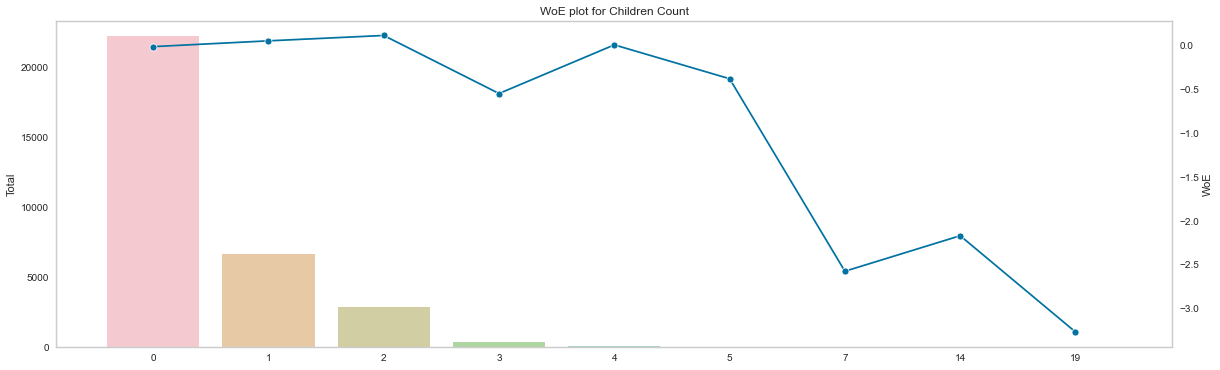

In [261]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = CNT_CHILDREN_df.Cutoff , y = CNT_CHILDREN_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = CNT_CHILDREN_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Children Count")
plt.show()

In [263]:
AMT_INCOME_TOTAL_df = woe_df.loc[woe_df["Variable"] == "AMT_INCOME_TOTAL"]
AMT_INCOME_TOTAL_df

Variable                 Cutoff     N  Events  % of Events  \
0  AMT_INCOME_TOTAL   (26999.999, 90000.0]  3996      78     0.130435   
1  AMT_INCOME_TOTAL    (90000.0, 112500.0]  3666      73     0.122074   
2  AMT_INCOME_TOTAL   (112500.0, 135000.0]  5182     101     0.168896   
3  AMT_INCOME_TOTAL   (135000.0, 139500.0]   120       1     0.001672   
4  AMT_INCOME_TOTAL   (139500.0, 157500.0]  3523      47     0.078595   
5  AMT_INCOME_TOTAL   (157500.0, 180000.0]  3478      69     0.115385   
6  AMT_INCOME_TOTAL   (180000.0, 211500.0]  2596      46     0.076923   
7  AMT_INCOME_TOTAL   (211500.0, 247500.0]  3871      73     0.122074   
8  AMT_INCOME_TOTAL   (247500.0, 315000.0]  3392      73     0.122074   
9  AMT_INCOME_TOTAL  (315000.0, 1575000.0]  2353      37     0.061873   

   Non-Events  % of Non-Events       WoE        IV  
0        3918         0.124070 -0.050029  0.000318  
1        3593         0.113778 -0.070374  0.000584  
2        5081         0.160898 -0.048514  0.000388  
3         119         0.003768  0.812467  0.001703  
4        3476         0.110073  0.336833  0.010603  
5        3409         0.107951 -0.066589  0.000495  
6        2550         0.080750  0.048550  0.000186  
7        3798         0.120270 -0.014886  0.000027  
8        3319         0.105101 -0.149697  0.002541  
9        2316         0.073340  0.170022  0.001950

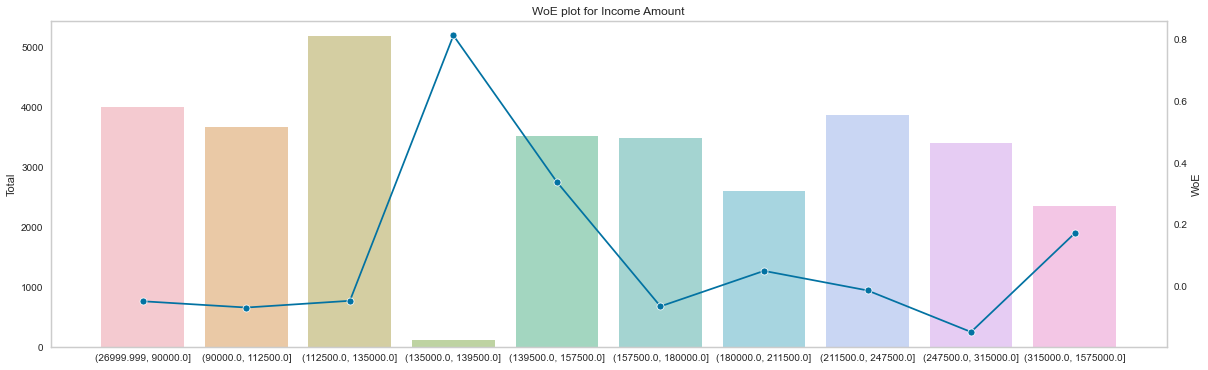

In [264]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = AMT_INCOME_TOTAL_df.Cutoff , y = AMT_INCOME_TOTAL_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = AMT_INCOME_TOTAL_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Income Amount")
plt.show()

In [266]:
CNT_FAM_MEMBERS_df = woe_df.loc[woe_df["Variable"] == "CNT_FAM_MEMBERS"]
CNT_FAM_MEMBERS_df

Variable Cutoff      N  Events  % of Events  Non-Events  \
0  CNT_FAM_MEMBERS      1   6168     136     0.227425        6032   
1  CNT_FAM_MEMBERS      2  17166     305     0.510033       16861   
2  CNT_FAM_MEMBERS      3   5665     101     0.168896        5564   
3  CNT_FAM_MEMBERS      4   2748      43     0.071906        2705   
4  CNT_FAM_MEMBERS      5    357      12     0.020067         345   
5  CNT_FAM_MEMBERS      6     50       1     0.001672          49   
6  CNT_FAM_MEMBERS      7     17       0     0.000836          17   
7  CNT_FAM_MEMBERS      9      2       0     0.000836           2   
8  CNT_FAM_MEMBERS     15      3       0     0.000836           3   
9  CNT_FAM_MEMBERS     20      1       0     0.000836           1   

   % of Non-Events       WoE        IV  
0         0.191013 -0.174478  0.006353  
1         0.533931  0.045790  0.001094  
2         0.176193  0.042295  0.000309  
3         0.085658  0.175000  0.002407  
4         0.010925 -0.608019  0.005558  
5         0.001552 -0.074837  0.000009  
6         0.000538 -0.440296  0.000131  
7         0.000063 -2.580363  0.001994  
8         0.000095 -2.174897  0.001612  
9         0.000032 -3.273510  0.002633

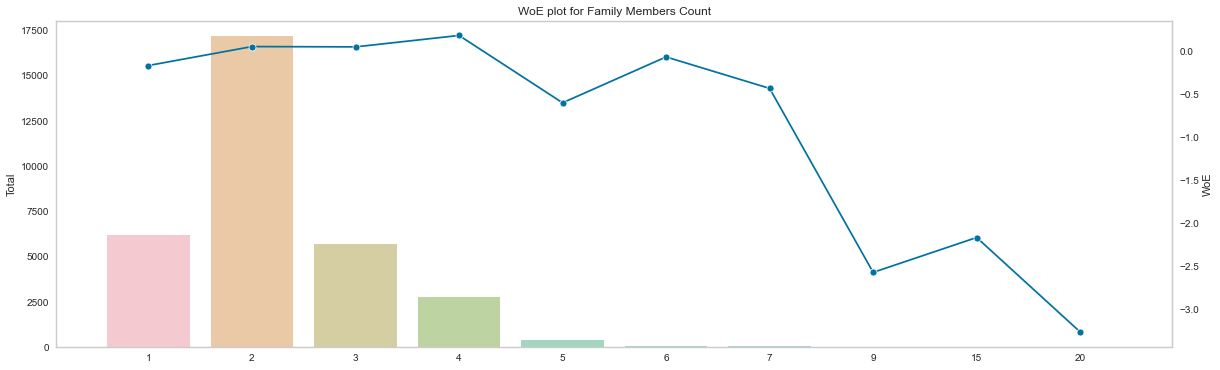

In [267]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = CNT_FAM_MEMBERS_df.Cutoff , y = CNT_FAM_MEMBERS_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = CNT_FAM_MEMBERS_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Family Members Count")
plt.show()

In [269]:
CUST_FOR_MONTHS_df = woe_df.loc[woe_df["Variable"] == "CUST_FOR_MONTHS"]
CUST_FOR_MONTHS_df

Variable         Cutoff     N  Events  % of Events  Non-Events  \
0  CUST_FOR_MONTHS  (-0.001, 5.0]  3471      11     0.018395        3460   
1  CUST_FOR_MONTHS    (5.0, 10.0]  3610      44     0.073579        3566   
2  CUST_FOR_MONTHS   (10.0, 14.0]  2780      39     0.065217        2741   
3  CUST_FOR_MONTHS   (14.0, 19.0]  3313      52     0.086957        3261   
4  CUST_FOR_MONTHS   (19.0, 24.0]  3040      42     0.070234        2998   
5  CUST_FOR_MONTHS   (24.0, 30.0]  3453      66     0.110368        3387   
6  CUST_FOR_MONTHS   (30.0, 36.0]  3049      60     0.100334        2989   
7  CUST_FOR_MONTHS   (36.0, 42.0]  3079      89     0.148829        2990   
8  CUST_FOR_MONTHS   (42.0, 50.0]  3187      84     0.140468        3103   
9  CUST_FOR_MONTHS   (50.0, 60.0]  3195     111     0.185619        3084   

   % of Non-Events       WoE        IV  
0         0.109566  1.784472  0.162694  
1         0.112923  0.428353  0.016853  
2         0.086798  0.285860  0.006169  
3         0.103265  0.171889  0.002803  
4         0.094937  0.301374  0.007445  
5         0.107255 -0.028612  0.000089  
6         0.094652 -0.058307  0.000331  
7         0.094683 -0.452265  0.024488  
8         0.098262 -0.357349  0.015083  
9         0.097660 -0.642204  0.056488

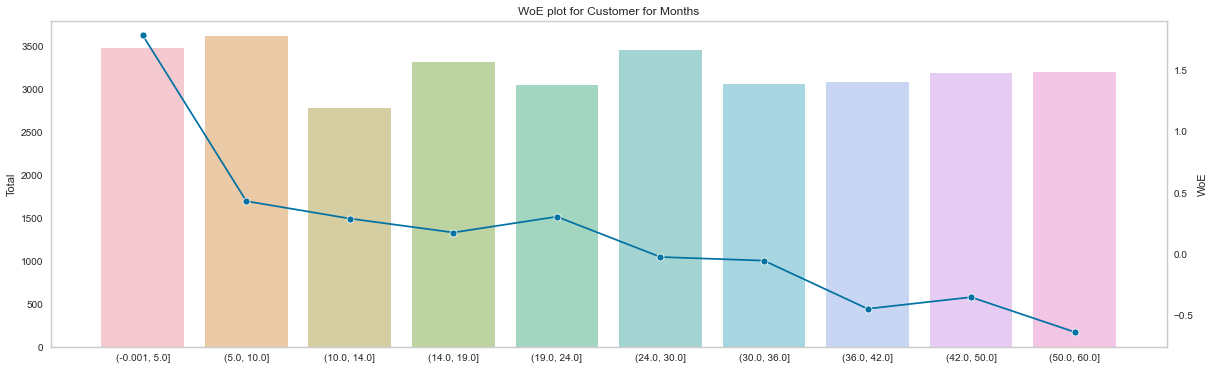

In [270]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = CUST_FOR_MONTHS_df.Cutoff , y = CUST_FOR_MONTHS_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = CUST_FOR_MONTHS_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Customer for Months")
plt.show()

In [271]:
EMP_YEARS_df = woe_df.loc[woe_df["Variable"] == "EMP_YEARS"]
EMP_YEARS_df

Variable            Cutoff     N  Events  % of Events  Non-Events  \
0  EMP_YEARS   (-1.001, 0.542]  6439     147     0.245819        6292   
1  EMP_YEARS     (0.542, 1.69]  3221      74     0.123746        3147   
2  EMP_YEARS     (1.69, 2.937]  3223      73     0.122074        3150   
3  EMP_YEARS    (2.937, 4.216]  3241      53     0.088629        3188   
4  EMP_YEARS    (4.216, 5.661]  3182      51     0.085284        3131   
5  EMP_YEARS    (5.661, 7.521]  3247      60     0.100334        3187   
6  EMP_YEARS    (7.521, 9.805]  3189      47     0.078595        3142   
7  EMP_YEARS   (9.805, 14.619]  3223      55     0.091973        3168   
8  EMP_YEARS  (14.619, 43.049]  3212      38     0.063545        3174   

   % of Non-Events       WoE        IV  
0         0.199246 -0.210055  0.009783  
1         0.099655 -0.216517  0.005216  
2         0.099750 -0.201959  0.004508  
3         0.100953  0.130200  0.001605  
4         0.099148  0.150625  0.002088  
5         0.100921  0.005834  0.000003  
6         0.099497  0.235810  0.004929  
7         0.100320  0.086866  0.000725  
8         0.100510  0.458505  0.016948

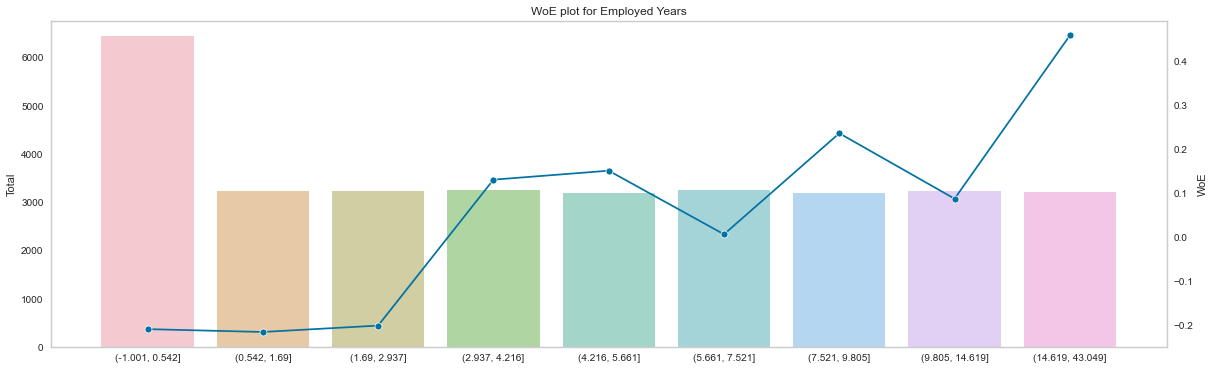

In [272]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = EMP_YEARS_df.Cutoff , y = EMP_YEARS_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = EMP_YEARS_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Employed Years")
plt.show()

In [273]:
AGE_df = woe_df.loc[woe_df["Variable"] == "AGE"]
AGE_df

Variable            Cutoff     N  Events  % of Events  Non-Events  \
0      AGE  (20.517, 28.641]  3231      60     0.100334        3171   
1      AGE  (28.641, 32.364]  3210      70     0.117057        3140   
2      AGE  (32.364, 35.847]  3213      67     0.112040        3146   
3      AGE  (35.847, 39.285]  3220      46     0.076923        3174   
4      AGE  (39.285, 42.644]  3215      52     0.086957        3163   
5      AGE  (42.644, 46.703]  3217      48     0.080268        3169   
6      AGE  (46.703, 51.053]  3218      62     0.103679        3156   
7      AGE  (51.053, 55.622]  3221      86     0.143813        3135   
8      AGE  (55.622, 60.312]  3222      53     0.088629        3169   
9      AGE   (60.312, 68.91]  3210      54     0.090301        3156   

   % of Non-Events       WoE            IV  
0         0.100415  0.000801  6.437548e-08  
1         0.099433 -0.163174  2.875728e-03  
2         0.099623 -0.117462  1.458527e-03  
3         0.100510  0.267450  6.308269e-03  
4         0.100161  0.141376  1.866862e-03  
5         0.100351  0.223313  4.485015e-03  
6         0.099940 -0.036731  1.373391e-04  
7         0.099275 -0.370620  1.650661e-02  
8         0.100351  0.124223  1.456229e-03  
9         0.099940  0.101420  9.775679e-04

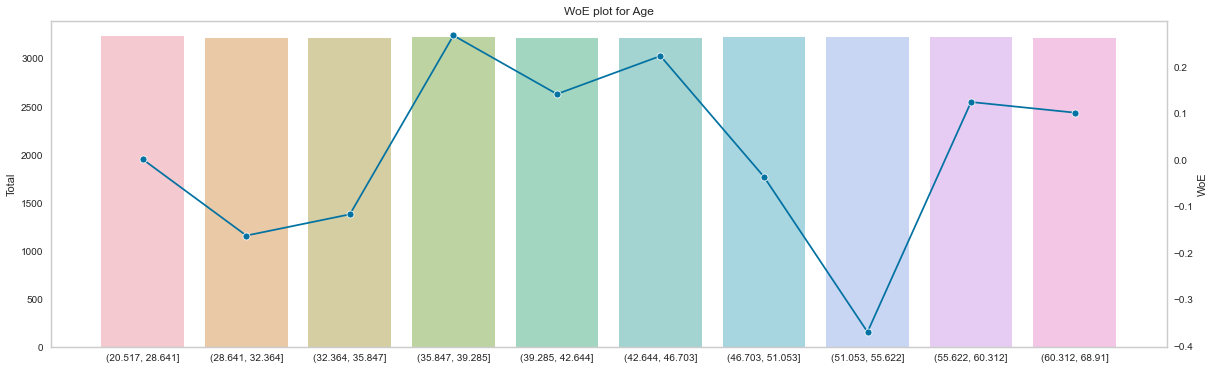

In [274]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.barplot(x = AGE_df.Cutoff , y = AGE_df['N'], alpha=0.5, ax = ax1)
ax1.grid(False)

#keep the x axis as common and create a second y axis for plot 2
ax2 = ax1.twinx()
ax2.grid(False)

ax1.set(xlabel='', ylabel='Total')
sns.lineplot(data = AGE_df['WoE'], marker='o', sort = False, ax=ax2)
plt.title("WoE plot for Age")
plt.show()

# Credit Scoring

In [ ]:
import scorecardpy as sc
import pprint

In [ ]:
merged_for_credit_score = merged.loc[:, :"AGE"].copy()
merged_for_credit_score.head()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            0             1                1             0          427500.0   
1            0             1                1             0          427500.0   
2            0             1                1             0          112500.0   
3            1             0                1             0          270000.0   
4            1             0                1             0          270000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0   Rented apartment                1           0           0      Unemployed   
1   Rented apartment                1           0           0      Unemployed   
2  House / apartment                0           0           0  Security staff   
3  House / apartment                0           1           1     Sales staff   
4  House / apartment                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  CUST_FOR_MONTHS  target  EMP_YEARS        AGE  
0                2               15       0  12.443836  32.890411  
1                2               14       0  12.443836  32.890411  
2                2               29       0   3.106849  58.832877  
3                1                4       0   8.358904  52.356164  
4                1               26       0   8.358904  52.356164

In [ ]:
bins = sc.woebin(merged_for_credit_score, y='target', sort=False)
print(bins)

[INFO] creating woe binning ...
Binning on 32177 rows and 18 columns in 00:00:17
{'AMT_INCOME_TOTAL':            variable                  bin  count  count_distr   good  bad  \
0  AMT_INCOME_TOTAL       [-inf,90000.0)   2441     0.075862   2400   41   
1  AMT_INCOME_TOTAL   [90000.0,110000.0)   2571     0.079902   2505   66   
2  AMT_INCOME_TOTAL  [110000.0,120000.0)   2922     0.090810   2876   46   
3  AMT_INCOME_TOTAL  [120000.0,140000.0)   5030     0.156323   4930  100   
4  AMT_INCOME_TOTAL  [140000.0,160000.0)   3527     0.109612   3480   47   
5  AMT_INCOME_TOTAL  [160000.0,280000.0)  11767     0.365696  11546  221   
6  AMT_INCOME_TOTAL  [280000.0,330000.0)   1618     0.050284   1577   41   
7  AMT_INCOME_TOTAL       [330000.0,inf)   2301     0.071511   2265   36   

    badprob       woe    bin_iv  total_iv    breaks  is_special_values  
0  0.016796 -0.102995  0.000766  0.032817   90000.0              False  
1  0.025671  0.330268  0.010253  0.032817  110000.0              Fa

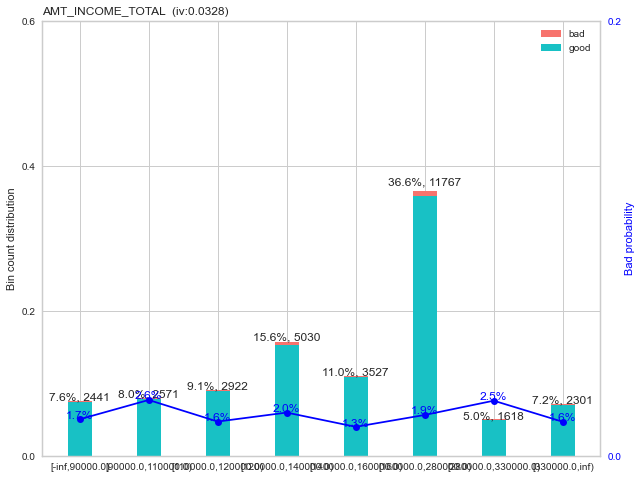

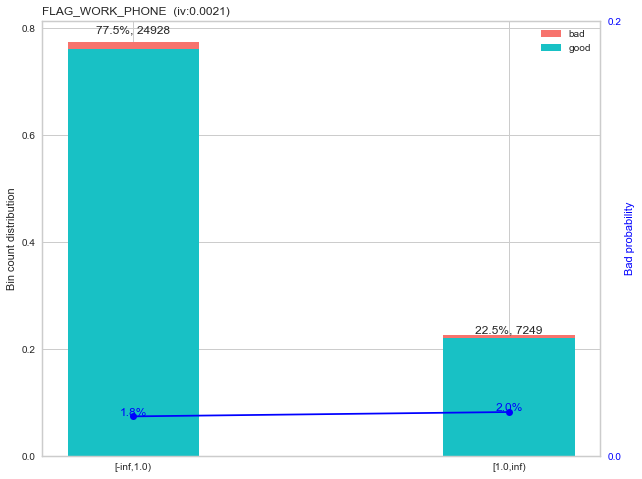

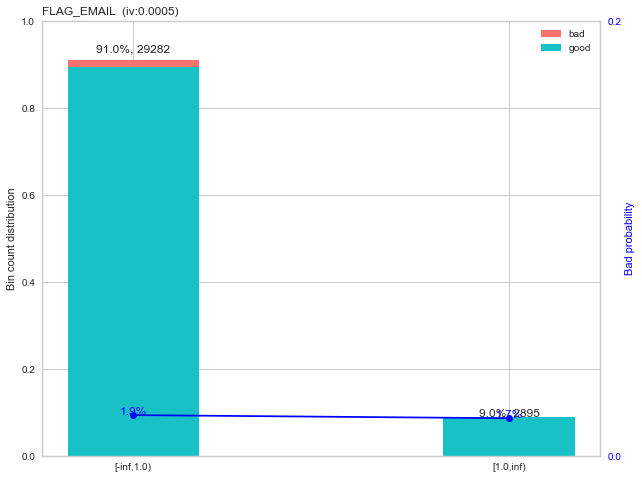

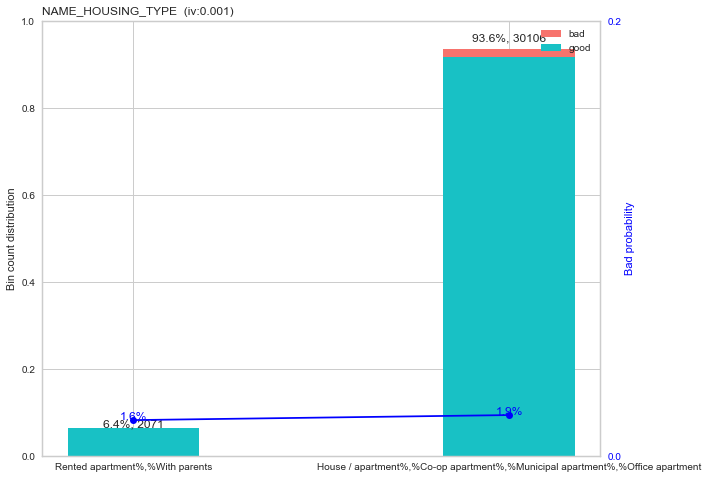

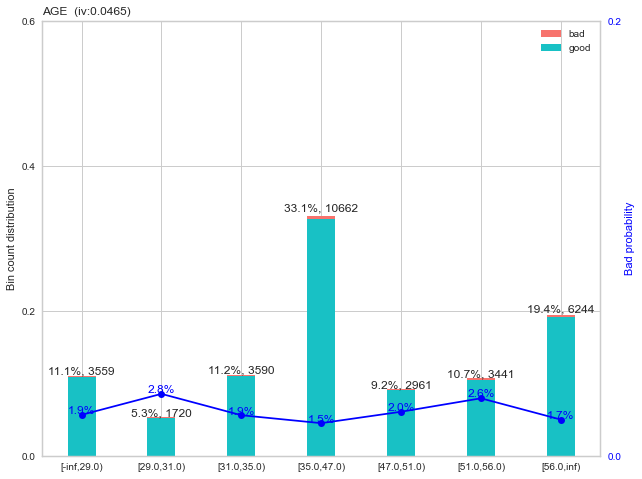

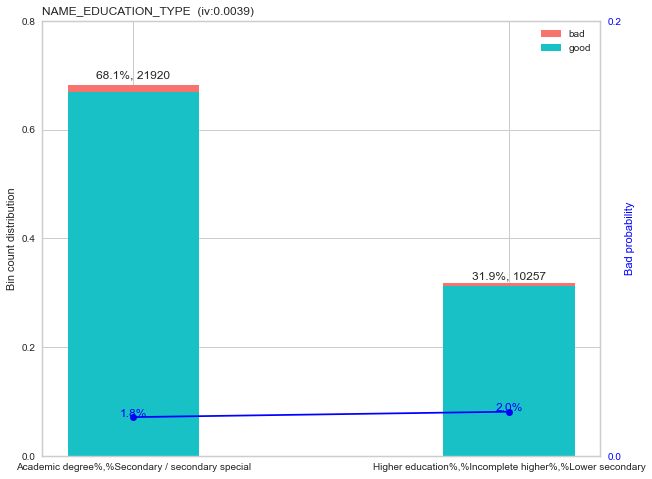

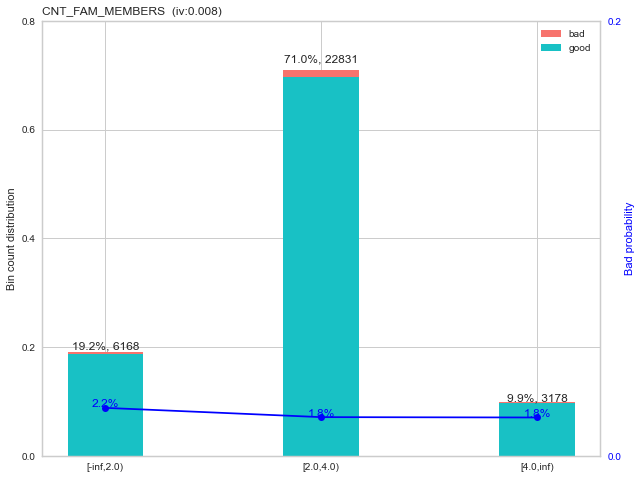

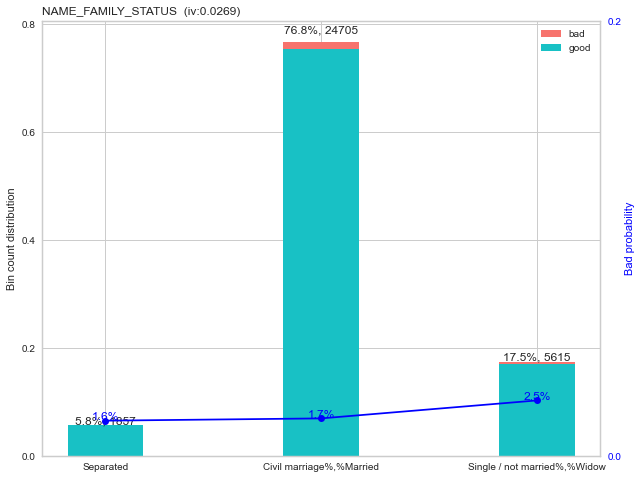

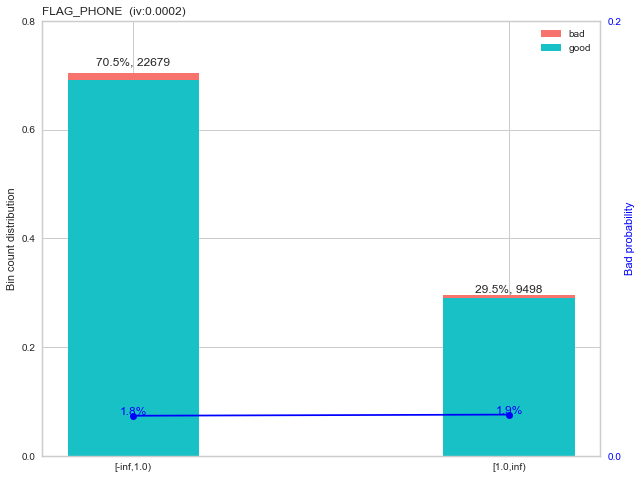

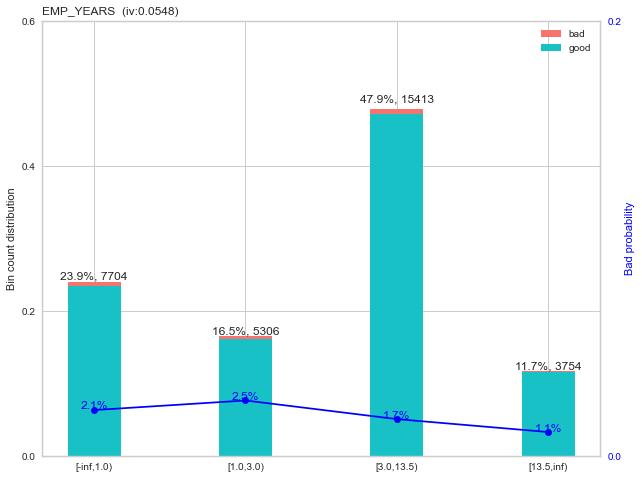

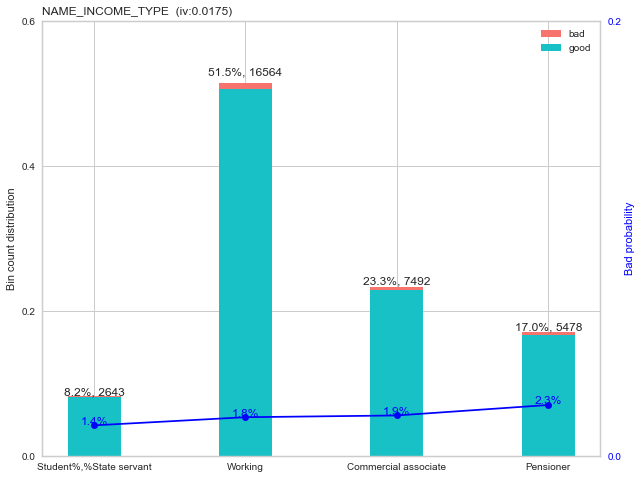

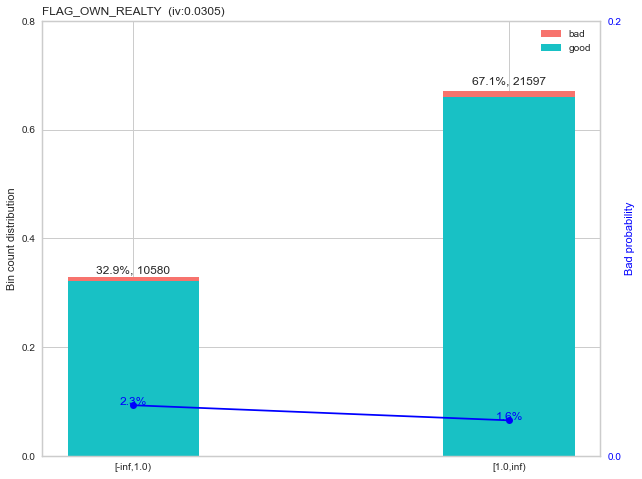

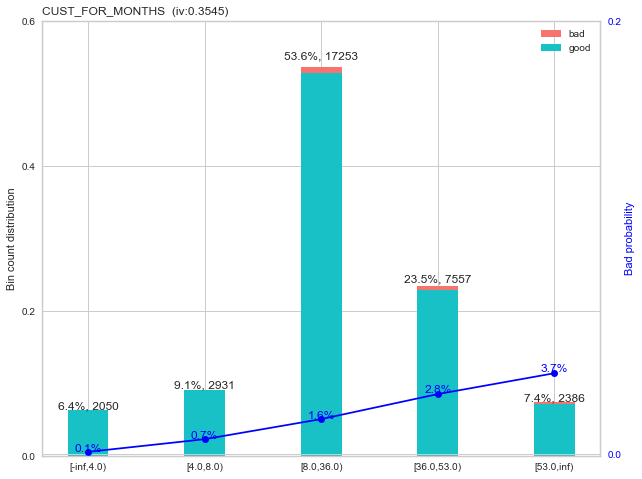

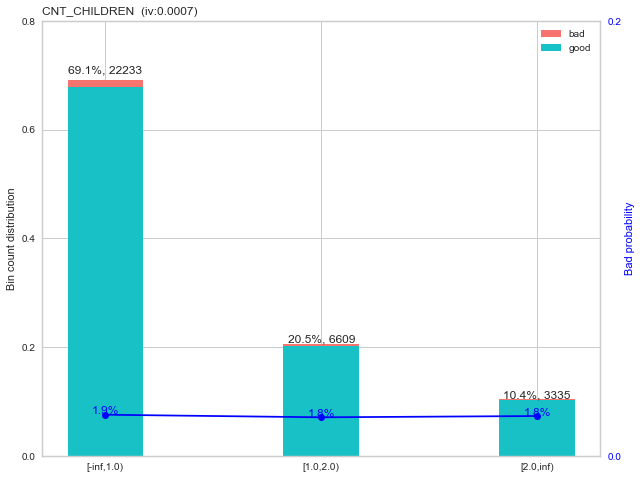

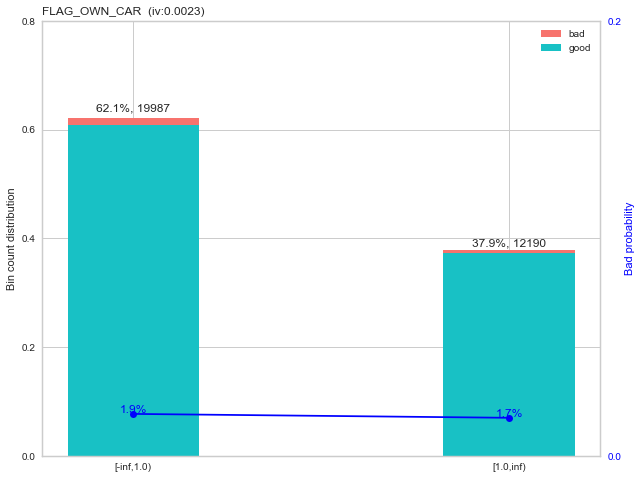

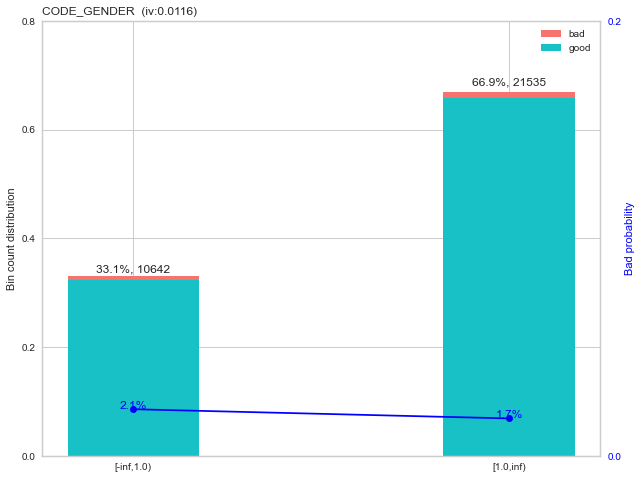

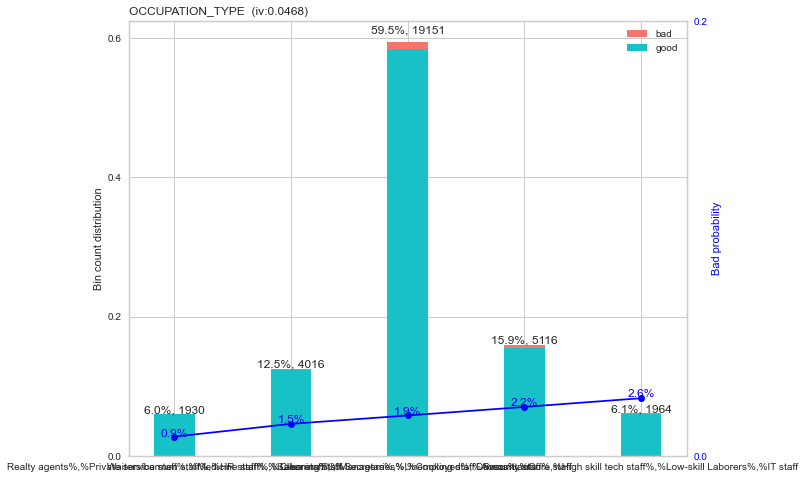

In [ ]:
sc.woebin_plot(bins)
plt.show()

In [73]:
IV_arr = []
for key in bins.keys():
    IV_arr.append([key, round(bins[key]["total_iv"].iloc[-1], 6)]) 
IV_arr = sorted(IV_arr, key=lambda item: item[1], reverse=True)
IV_df = pd.DataFrame(IV_arr, columns=["Variable", "IV"])
IV_df

Variable        IV
0       CUST_FOR_MONTHS  0.354461
1             EMP_YEARS  0.054833
2       OCCUPATION_TYPE  0.046848
3                   AGE  0.046517
4      AMT_INCOME_TOTAL  0.032817
5       FLAG_OWN_REALTY  0.030487
6    NAME_FAMILY_STATUS  0.026882
7      NAME_INCOME_TYPE  0.017488
8           CODE_GENDER  0.011588
9       CNT_FAM_MEMBERS  0.008037
10  NAME_EDUCATION_TYPE  0.003949
11         FLAG_OWN_CAR  0.002292
12      FLAG_WORK_PHONE  0.002058
13    NAME_HOUSING_TYPE  0.001028
14         CNT_CHILDREN  0.000712
15           FLAG_EMAIL  0.000530
16           FLAG_PHONE  0.000168

In [ ]:
# 70% train and 30% test

train, test = sc.split_df(merged_for_credit_score, 'target', ratio=0.7).values()
print(train.shape)
print(test.shape)

(22524, 18)
(9653, 18)


In [ ]:
# Prep dataset with WOE values for Log Reg training

train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


target  AMT_INCOME_TOTAL_woe  CUST_FOR_MONTHS_woe  FLAG_WORK_PHONE_woe  \
0           0             -0.175154            -0.145219             0.081991   
4           0              0.010725            -0.145219            -0.025109   
7           0              0.316949            -0.145219            -0.025109   
8           0              0.316949            -0.145219            -0.025109   
10          0              0.010725            -1.013863             0.081991   
...       ...                   ...                  ...                  ...   
36448       1              0.010725            -0.145219             0.081991   
36449       1             -0.175154            -0.145219            -0.025109   
36450       1              0.330268            -0.145219            -0.025109   
36454       1             -0.337983            -0.145219            -0.025109   
36455       1              0.316949            -0.145219            -0.025109   

       FLAG_EMAIL_woe  CNT_CHILDREN_woe  NAME_HOUSING_TYPE_woe   AGE_woe  \
0            0.007096          0.016650              -0.126216  0.004281   
4           -0.074638          0.016650               0.008143  0.360801   
7            0.007096          0.016650               0.008143 -0.111532   
8            0.007096          0.016650               0.008143 -0.111532   
10          -0.074638          0.016650               0.008143 -0.217490   
...               ...               ...                    ...       ...   
36448        0.007096          0.016650               0.008143  0.437300   
36449       -0.074638         -0.049495               0.008143  0.013120   
36450        0.007096          0.016650               0.008143  0.360801   
36454       -0.074638          0.016650               0.008143  0.004281   
36455        0.007096          0.016650               0.008143  0.088191   

       FLAG_OWN_CAR_woe  NAME_EDUCATION_TYPE_woe  CODE_GENDER_woe  \
0             -0.062794                 0.088967         0.145096   
4              0.036513                -0.044399        -0.079944   
7              0.036513                 0.088967        -0.079944   
8              0.036513                 0.088967        -0.079944   
10            -0.062794                 0.088967         0.145096   
...                 ...                      ...              ...   
36448         -0.062794                -0.044399         0.145096   
36449         -0.062794                 0.088967         0.145096   
36450         -0.062794                -0.044399         0.145096   
36454          0.036513                 0.088967        -0.079944   
36455          0.036513                -0.044399        -0.079944   

       NAME_FAMILY_STATUS_woe  FLAG_PHONE_woe  OCCUPATION_TYPE_woe  \
0                   -0.078662       -0.008453            -0.002625   
4                    0.322102        0.019910            -0.239047   
7                   -0.142576       -0.008453            -0.002625   
8                   -0.142576       -0.008453            -0.002625   
10                  -0.078662        0.019910            -0.002625   
...                       ...             ...                  ...   
36448               -0.078662       -0.008453            -0.002625   
36449               -0.078662        0.019910             0.194196   
36450               -0.078662       -0.008453            -0.002625   
36454               -0.078662        0.019910            -0.756558   
36455               -0.078662       -0.008453            -0.239047   

       CNT_FAM_MEMBERS_woe  NAME_INCOME_TYPE_woe  EMP_YEARS_woe  \
0                -0.044922             -0.046842      -0.098615   
4                 0.174478             -0.001733      -0.098615   
7                 0.174478              0.233835       0.126011   
8                 0.174478              0.233835       0.126011   
10               -0.044922             -0.046842       0.321110   
...                    ...                   ... 

In [ ]:
# create the X & y for train & test

y_train = train_woe.loc[:,'target']
X_train = train_woe.loc[:,train_woe.columns != 'target']
y_test = test_woe.loc[:,'target']
X_test = test_woe.loc[:,test_woe.columns != 'target']

# create the log reg model

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)

[[ 0.83702584  1.10266409 -0.04482977  0.11130513  0.07411283  0.56657632
   1.0329233   1.00645791  0.43407919  0.78332851  1.29858587  0.07502029
   1.07998058 -0.56358084  0.83544951  0.74198703  0.81477064]]
[-3.96624628]


In [ ]:
# Label "1" was never predicted

set(y_test) - set(y_pred)

{1}

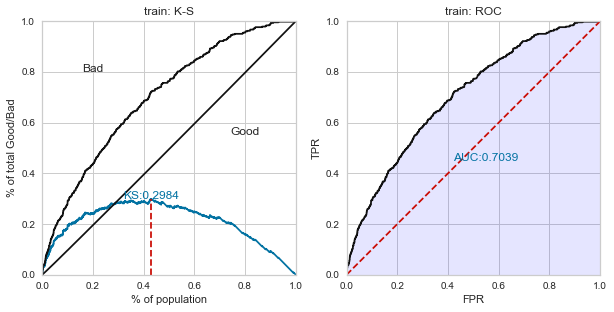

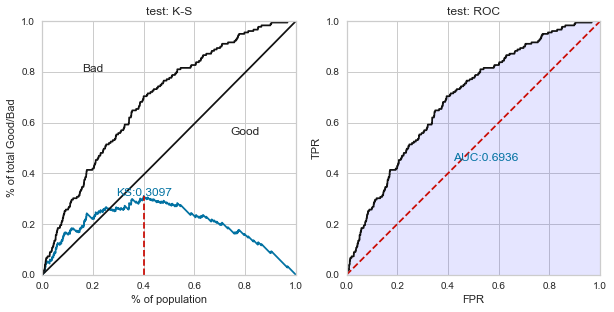

In [ ]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [ ]:
# Hence, we are only interested in the label(s) that were predicted
# which is just "0"

print(classification_report(y_pred, y_test, labels=np.unique(y_pred)))
print(confusion_matrix(y_pred, y_test, labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9653

   micro avg       1.00      0.98      0.99      9653
   macro avg       1.00      0.98      0.99      9653
weighted avg       1.00      0.98      0.99      9653

[[9474]]


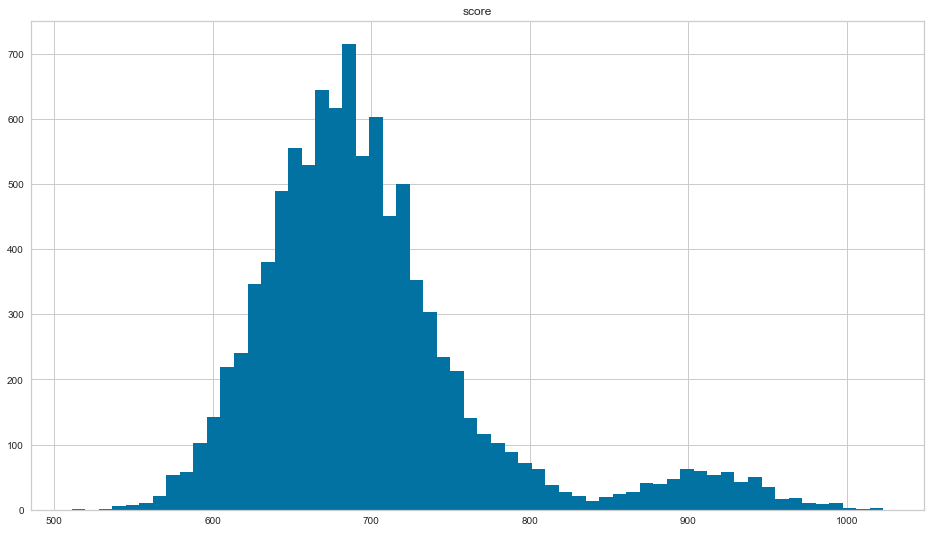

In [ ]:
# calculate credit score using the results from the scorecard generated

score_card = sc.scorecard(bins, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, score_card)
test_score = sc.scorecard_ply(test, score_card)
test_score.hist(figsize=(16,9), bins=60)
plt.show()

In [ ]:
# generate scorecard

pprint.pprint(score_card)

{'AGE':    variable          bin  points
14      AGE  [-inf,29.0)    -1.0
15      AGE  [29.0,31.0)   -33.0
16      AGE  [31.0,35.0)    -0.0
17      AGE  [35.0,47.0)    16.0
18      AGE  [47.0,51.0)    -7.0
19      AGE  [51.0,56.0)   -27.0
20      AGE   [56.0,inf)     8.0,
 'AMT_INCOME_TOTAL':            variable                  bin  points
0  AMT_INCOME_TOTAL       [-inf,90000.0)     6.0
1  AMT_INCOME_TOTAL   [90000.0,110000.0)   -20.0
2  AMT_INCOME_TOTAL  [110000.0,120000.0)    10.0
3  AMT_INCOME_TOTAL  [120000.0,140000.0)    -4.0
4  AMT_INCOME_TOTAL  [140000.0,160000.0)    20.0
5  AMT_INCOME_TOTAL  [160000.0,280000.0)    -1.0
6  AMT_INCOME_TOTAL  [280000.0,330000.0)   -19.0
7  AMT_INCOME_TOTAL       [330000.0,inf)    11.0,
 'CNT_CHILDREN':         variable         bin  points
46  CNT_CHILDREN  [-inf,1.0)    -0.0
47  CNT_CHILDREN   [1.0,2.0)     0.0
48  CNT_CHILDREN   [2.0,inf)     0.0,
 'CNT_FAM_MEMBERS':            variable         bin  points
23  CNT_FAM_MEMBERS  [-inf,2.0)     7.

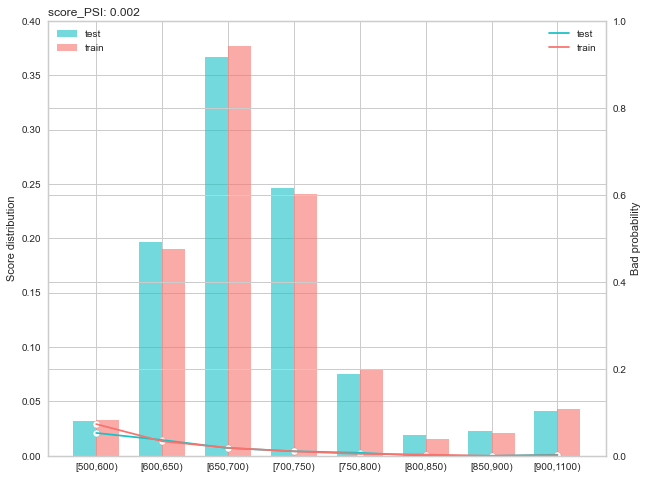

In [ ]:
# evaluate scorecard using PSI

sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)
plt.show()

**Filter Variables with IV value >= 0.02**

In [ ]:
filtered_bins = {}
merged_for_credit_score_2 = merged_for_credit_score.copy()

for b in bins:
    iv_value_to_check = bins[b]["total_iv"].values[-1]
    if iv_value_to_check >= 0.02:
        filtered_bins[b] = bins[b]
    else:
        merged_for_credit_score_2.drop(columns=[b], inplace = True)
        continue

filtered_bins

{'AMT_INCOME_TOTAL':            variable                  bin  count  count_distr   good  bad  \
 0  AMT_INCOME_TOTAL       [-inf,90000.0)   2441     0.075862   2400   41   
 1  AMT_INCOME_TOTAL   [90000.0,110000.0)   2571     0.079902   2505   66   
 2  AMT_INCOME_TOTAL  [110000.0,120000.0)   2922     0.090810   2876   46   
 3  AMT_INCOME_TOTAL  [120000.0,140000.0)   5030     0.156323   4930  100   
 4  AMT_INCOME_TOTAL  [140000.0,160000.0)   3527     0.109612   3480   47   
 5  AMT_INCOME_TOTAL  [160000.0,280000.0)  11767     0.365696  11546  221   
 6  AMT_INCOME_TOTAL  [280000.0,330000.0)   1618     0.050284   1577   41   
 7  AMT_INCOME_TOTAL       [330000.0,inf)   2301     0.071511   2265   36   
 
     badprob       woe    bin_iv  total_iv    breaks  is_special_values  
 0  0.016796 -0.102995  0.000766  0.032817   90000.0              False  
 1  0.025671  0.330268  0.010253  0.032817  110000.0              False  
 2  0.015743 -0.168857  0.002389  0.032817  120000.0           

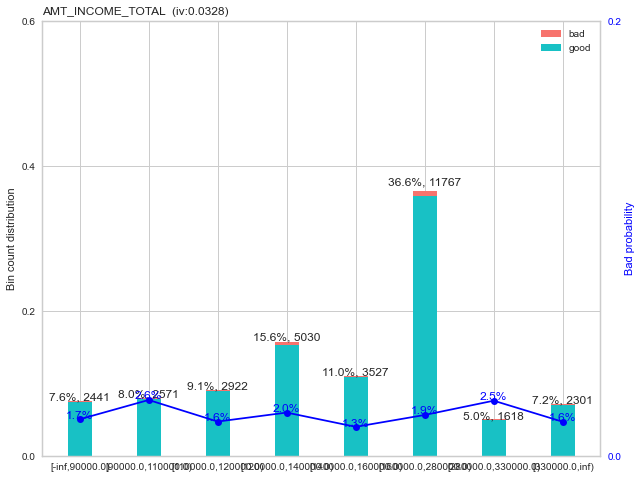

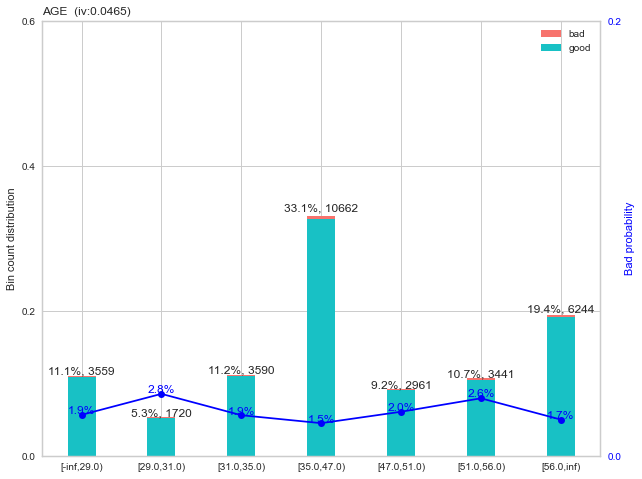

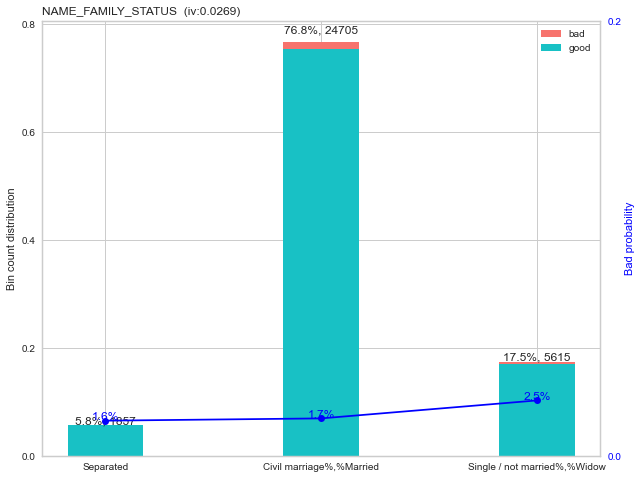

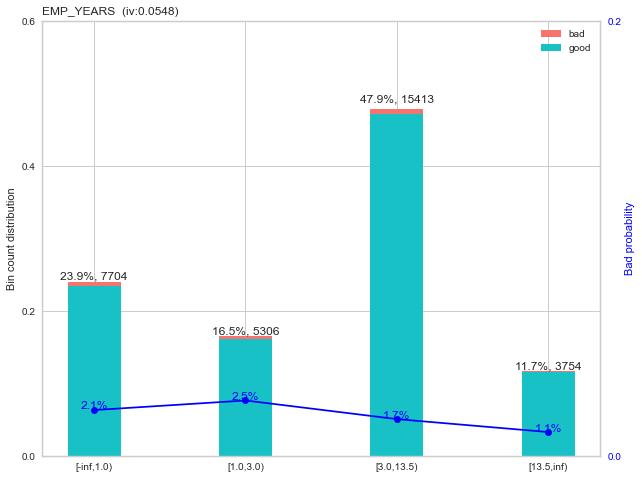

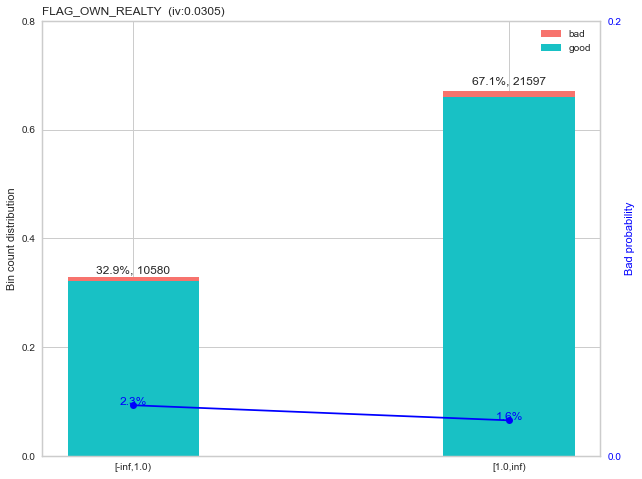

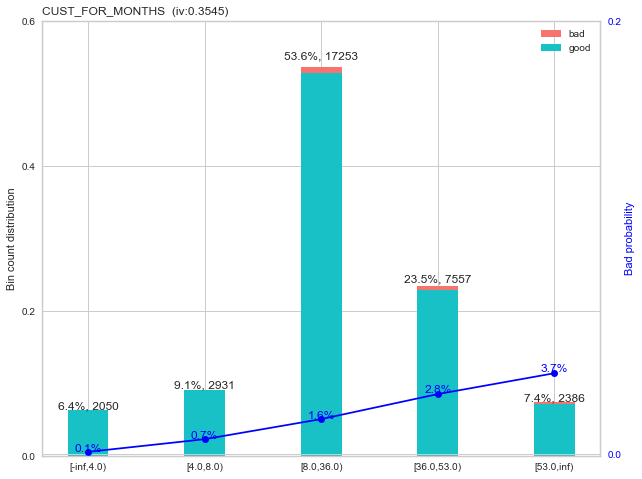

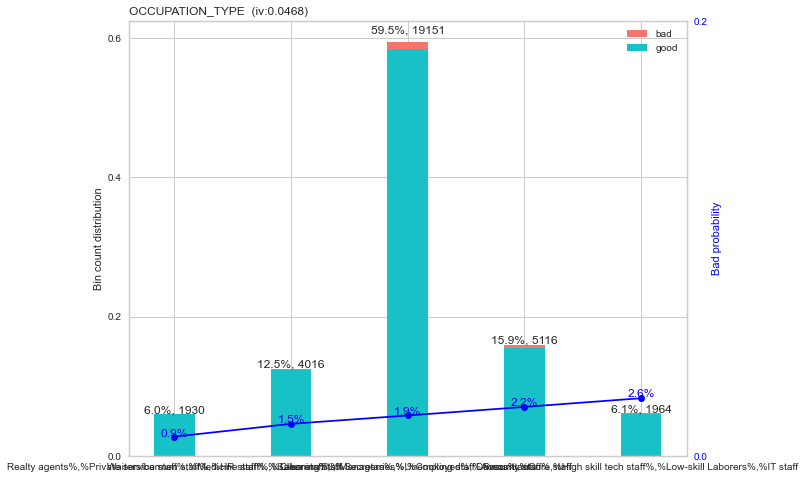

In [ ]:
sc.woebin_plot(filtered_bins)
plt.show()

In [ ]:
train_2, test_2 = sc.split_df(merged_for_credit_score_2, 'target', ratio=0.7).values()
print(train_2.shape)
print(test_2.shape)

(22524, 8)
(9653, 8)


In [ ]:
# Prepare a dataset with the WOE values for Logistic Regression training. woebin_ply() converts original values of input data into woe
train_woe_2 = sc.woebin_ply(train_2, filtered_bins)
test_woe_2 = sc.woebin_ply(test_2, filtered_bins)
train_woe

# create the X, y parts of data for train and test
X_train_2 = train_woe_2.loc[:,train_woe_2.columns != 'target']
y_train_2 = train_woe_2.loc[:,'target']
X_test_2 = test_woe_2.loc[:,test_woe_2.columns != 'target']
y_test_2 = test_woe_2.loc[:,'target']

# create a logistic regression model object
lr_2 = LogisticRegression(max_iter=1000)
lr_2.fit(X_train_2, y_train_2)
y_pred_2 = lr_2.predict(X_test_2)
print(lr_2.coef_)
print(lr_2.intercept_)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
[[0.83569661 1.10592366 0.98658939 0.87553599 1.09981964 1.10232952
  0.77171206]]
[-3.96680349]


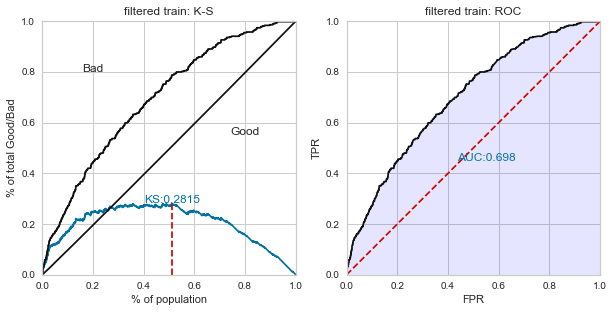

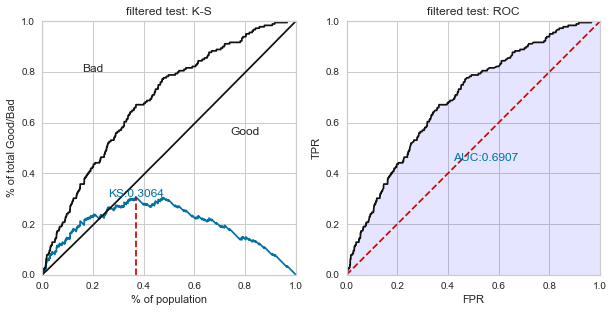

In [ ]:
# Evaluate the performance of the Logistic Regression
train_pred_2 = lr_2.predict_proba(X_train_2)[:,1]
test_pred_2 = lr_2.predict_proba(X_test_2)[:,1]

# performance ks & roc
train_perf_2 = sc.perf_eva(y_train_2, train_pred_2, title = "filtered train")
test_perf_2 = sc.perf_eva(y_test_2, test_pred_2, title = "filtered test")

In [ ]:
# Hence, we are only interested in the label(s) that were predicted
# which is just "0"

print(classification_report(y_pred_2, y_test_2, labels=np.unique(y_pred_2)))
print(confusion_matrix(y_pred_2, y_test_2, labels=np.unique(y_pred_2)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9653

   micro avg       1.00      0.98      0.99      9653
   macro avg       1.00      0.98      0.99      9653
weighted avg       1.00      0.98      0.99      9653

[[9474]]


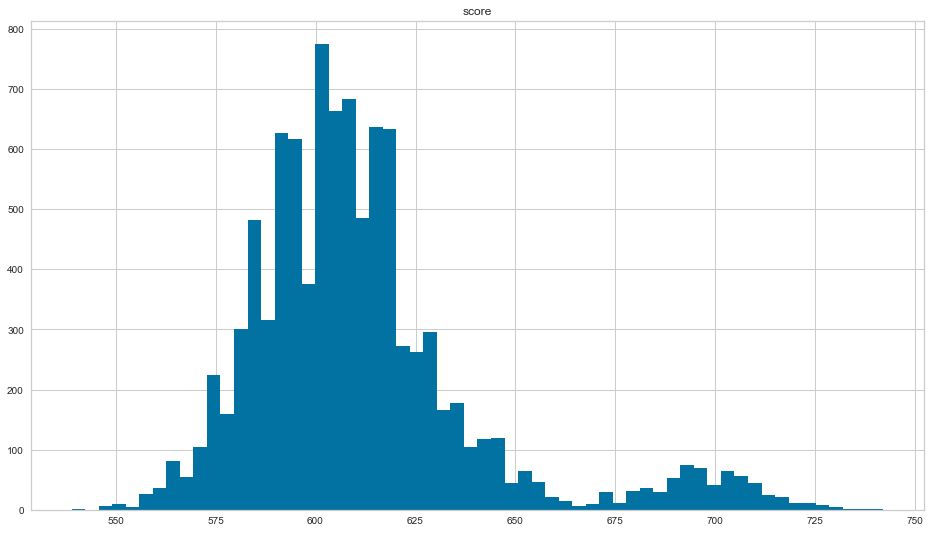

In [ ]:
# calculate credit score using the results from the scorecard generated

# scale final scorecard as well
score_card_2 = sc.scorecard(filtered_bins, lr_2, X_train_2.columns, basepoints_eq0 = 0, points0 = 600, odds0 = 1/50, pdo = 20)
# credit score
train_score_2 = sc.scorecard_ply(train_2, score_card_2)
test_score_2 = sc.scorecard_ply(test_2, score_card_2)
test_score_2.hist(figsize=(16,9), bins=60)
plt.show()

In [ ]:
pprint.pprint(score_card_2)

{'AGE':    variable          bin  points
8       AGE  [-inf,29.0)    -0.0
9       AGE  [29.0,31.0)   -12.0
10      AGE  [31.0,35.0)    -0.0
11      AGE  [35.0,47.0)     6.0
12      AGE  [47.0,51.0)    -3.0
13      AGE  [51.0,56.0)   -10.0
14      AGE   [56.0,inf)     3.0,
 'AMT_INCOME_TOTAL':            variable                  bin  points
0  AMT_INCOME_TOTAL       [-inf,90000.0)     2.0
1  AMT_INCOME_TOTAL   [90000.0,110000.0)    -8.0
2  AMT_INCOME_TOTAL  [110000.0,120000.0)     4.0
3  AMT_INCOME_TOTAL  [120000.0,140000.0)    -2.0
4  AMT_INCOME_TOTAL  [140000.0,160000.0)     8.0
5  AMT_INCOME_TOTAL  [160000.0,280000.0)    -0.0
6  AMT_INCOME_TOTAL  [280000.0,330000.0)    -8.0
7  AMT_INCOME_TOTAL       [330000.0,inf)     4.0,
 'CUST_FOR_MONTHS':            variable          bin  points
24  CUST_FOR_MONTHS   [-inf,4.0)    95.0
25  CUST_FOR_MONTHS    [4.0,8.0)    32.0
26  CUST_FOR_MONTHS   [8.0,36.0)     5.0
27  CUST_FOR_MONTHS  [36.0,53.0)   -13.0
28  CUST_FOR_MONTHS   [53.0,inf)   -23.

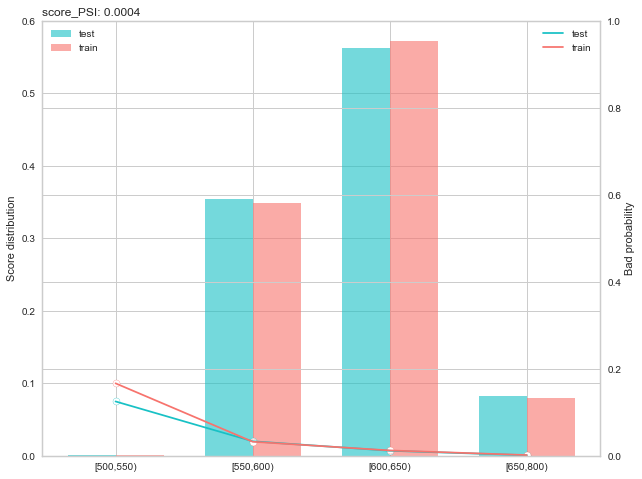

In [ ]:
# evaluate scorecard using PSI

sc.perf_psi(
  score = {'train':train_score_2, 'test':test_score_2},
  label = {'train':y_train_2, 'test':y_test_2}
)
plt.show()

In [ ]:
# save woe_bin datasets as csv files

# train_woe_2.to_csv("datasets/train_woe.csv")
# test_woe_2.to_csv("datasets/test_woe.csv")

# Dataset on WoE

In [65]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [66]:
#for svc, need to set binary = True

def plot_ROC_curve_svm(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, binary=True)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [67]:
# read woe csv files

train_woe = pd.read_csv("datasets/train_woe.csv")
test_woe = pd.read_csv("datasets/test_woe.csv")

In [68]:
train_woe.drop(["Unnamed: 0"], axis=1, inplace=True)

In [69]:
test_woe.drop(["Unnamed: 0"], axis=1, inplace=True)

**Train Test Split**

In [70]:
X_train = train_woe.loc[:,train_woe.columns != 'target']
y_train = train_woe.loc[:,'target']
X_test = test_woe.loc[:,test_woe.columns != 'target']
y_test = test_woe.loc[:,'target']

**SMOTE**

In [71]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**WoE Bins + oversampling**

In [ ]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
xgb.fit(X_balanced, y_balanced)
train_score = xgb.score(X_balanced, y_balanced)
test_score = xgb.score(X_test, y_test)
xgb_pred = xgb.predict(X_test)
print(train_score)
print(test_score)

C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9605745306491744
0.9569045892468663


C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [ ]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9474
           1       0.06      0.09      0.07       179

    accuracy                           0.96      9653
   macro avg       0.52      0.53      0.52      9653
weighted avg       0.97      0.96      0.96      9653



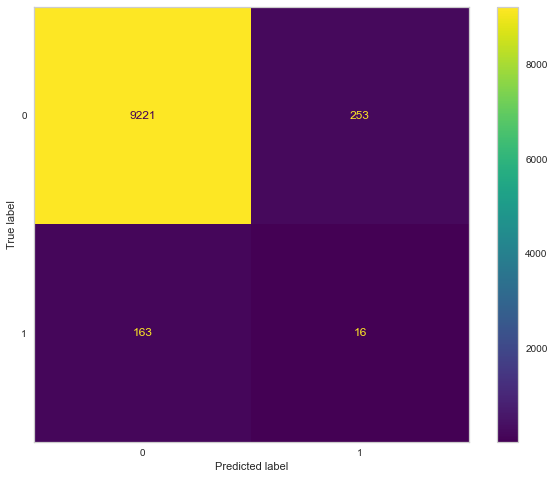

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, xgb_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


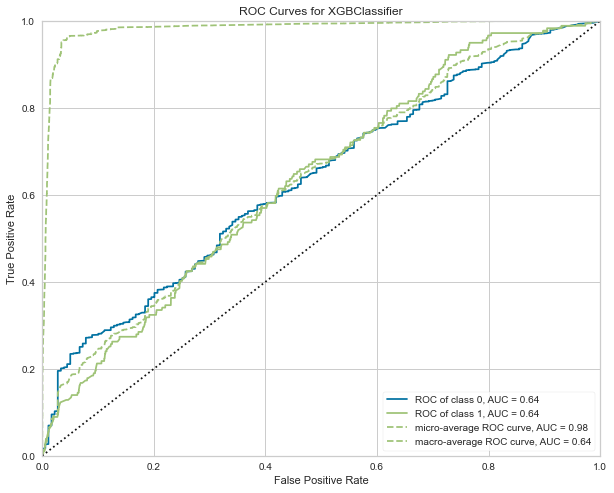

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(xgb, X_balanced, y_balanced, X_test, y_test)
plt.show()

**Just WoE Bins**

In [ ]:
xgb_2 = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
xgb_2.fit(X_train, y_train)
train_score = xgb_2.score(X_train, y_train)
test_score = xgb_2.score(X_test, y_test)
xgb_pred_2 = xgb_2.predict(X_test)
print(train_score)
print(test_score)

C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9829515183803943
0.9808349735833419


C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [ ]:
print(classification_report(y_test, xgb_pred_2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9474
           1       0.20      0.01      0.02       179

    accuracy                           0.98      9653
   macro avg       0.59      0.51      0.51      9653
weighted avg       0.97      0.98      0.97      9653



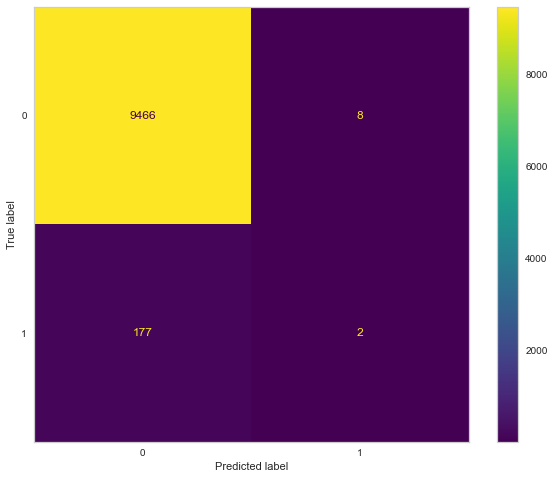

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, xgb_pred_2)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\wei-d\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


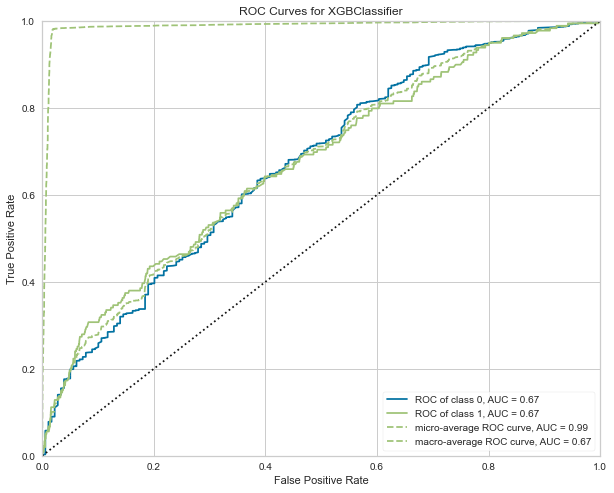

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(xgb_2, X_train, y_train, X_test, y_test)
plt.show()

# Decision Tree

**WoE Bins + oversampling**

In [ ]:
from sklearn import tree

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_leaf=2)
dt.fit(X_balanced, y_balanced)

dt_pred=dt.predict(X_test)

#Accuracy score
print(f"Accuracy train:  {round(dt.score(X_balanced, y_balanced), 4)}")
print(f"Accuracy test:  {round(dt.score(X_test, y_test),4 )}")

Accuracy train:  0.836
Accuracy test:  0.8974


In [ ]:
print(f'Classification Report Decision Tree: \n{classification_report(y_test, dt_pred)}')

Classification Report Decision Tree: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      9474
           1       0.03      0.17      0.06       179

    accuracy                           0.90      9653
   macro avg       0.51      0.54      0.50      9653
weighted avg       0.97      0.90      0.93      9653



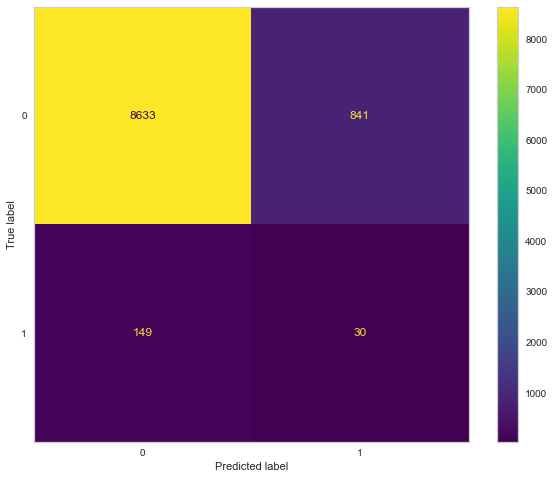

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


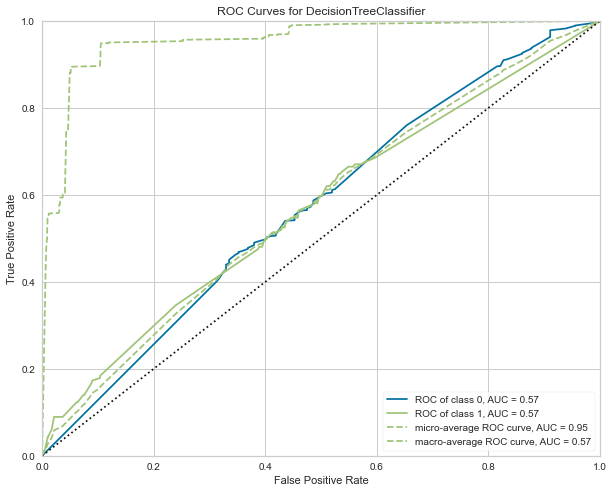

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(dt, X_balanced, y_balanced, X_test, y_test)
plt.show()

**Just WoE Bins**

In [ ]:
dt2 = tree.DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_leaf=2)
dt2.fit(X_train, y_train)

dt_pred2=dt2.predict(X_test)

#Accuracy score
print(f"Accuracy train:  {round(dt2.score(X_train, y_train), 4)}")
print(f"Accuracy test:  {round(dt2.score(X_test, y_test),4 )}")

Accuracy train:  0.9821
Accuracy test:  0.9803


In [ ]:
print(f'Classification Report Decision Tree: \n{classification_report(y_test, dt_pred2)}')

Classification Report Decision Tree: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9474
           1       0.13      0.01      0.02       179

    accuracy                           0.98      9653
   macro avg       0.56      0.50      0.51      9653
weighted avg       0.97      0.98      0.97      9653



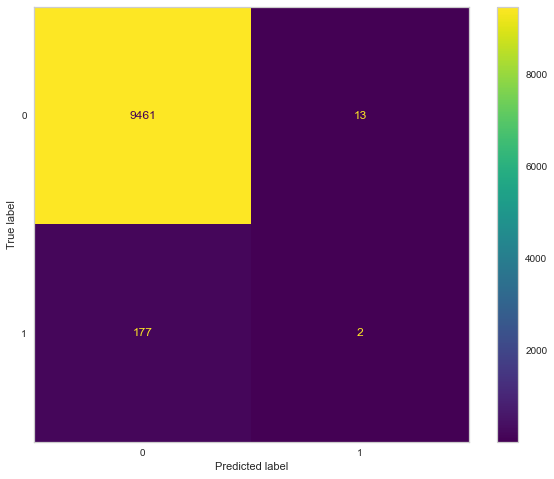

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, dt_pred2)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


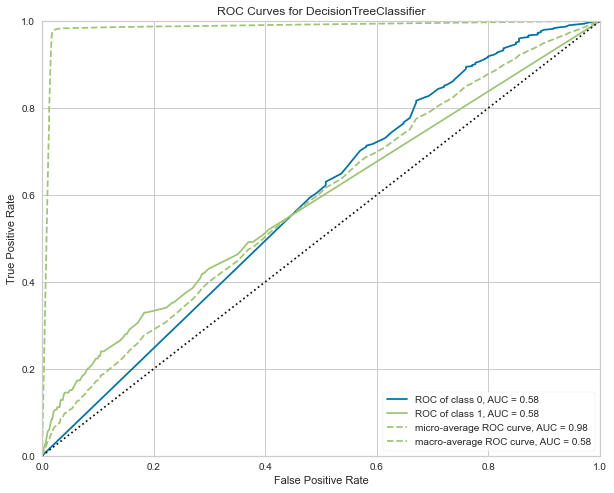

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(dt2, X_train, y_train, X_test, y_test)
plt.show()

# Logistic Regression

**WoE Bins + oversampling**

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_balanced, y_balanced)
lr_pred = lr.predict(X_test)

print(f"Accuracy train:  T2: {round(lr.score(X_balanced, y_balanced), 4)}")
print(f"Accuracy test: T2: {round(lr.score(X_test, y_test),4 )}")


Accuracy train:  T2: 0.6331
Accuracy test: T2: 0.6105


In [ ]:
print(f'Classification Report Logistic Regression: \n{classification_report(y_test, lr_pred)}')

Classification Report Logistic Regression: 
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      9474
           1       0.03      0.69      0.06       179

    accuracy                           0.61      9653
   macro avg       0.51      0.65      0.41      9653
weighted avg       0.97      0.61      0.74      9653



C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


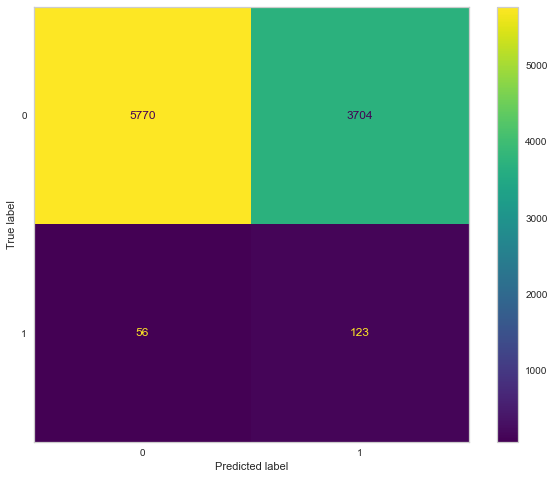

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, lr_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


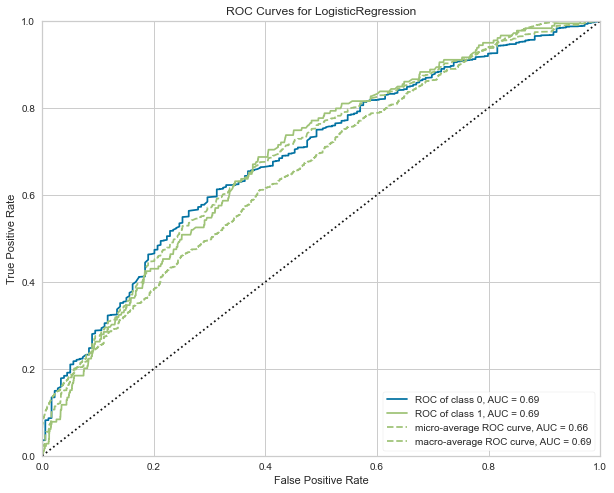

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(lr, X_balanced, y_balanced, X_test, y_test)
plt.show()

**Just WoE Bins**

In [ ]:
lr2 = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_pred2 = lr.predict(X_test)

print(f"Accuracy train:  T2: {round(lr.score(X_train, y_train), 4)}")
print(f"Accuracy test: T2: {round(lr.score(X_test, y_test),4 )}")

Accuracy train:  T2: 0.6098
Accuracy test: T2: 0.6085


In [ ]:
print(f'Classification Report Logistic Regression: \n{classification_report(y_test, lr_pred2)}')

Classification Report Logistic Regression: 
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      9474
           1       0.03      0.67      0.06       179

    accuracy                           0.61      9653
   macro avg       0.51      0.64      0.41      9653
weighted avg       0.97      0.61      0.74      9653



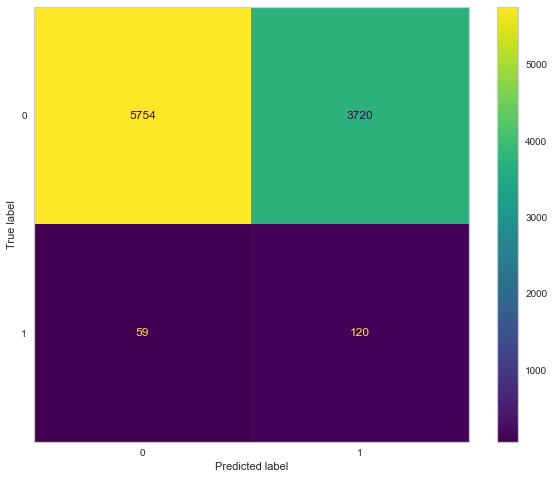

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, lr_pred2)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


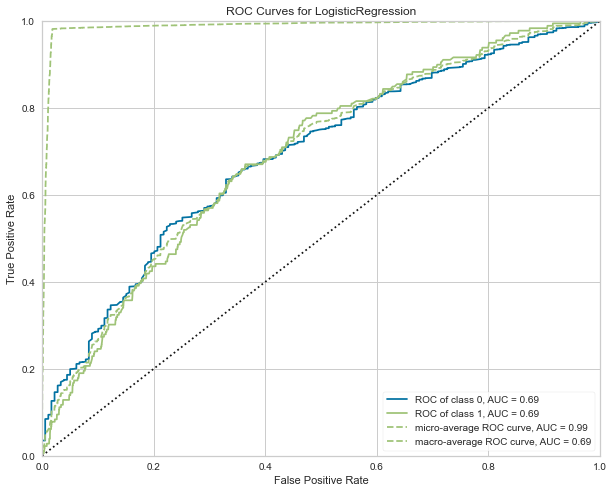

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(lr2, X_train, y_train, X_test, y_test)
plt.show()

## Random Forest

In [ ]:
print('Training Features Shape:', X_balanced.shape)
print('Training Labels Shape:', y_balanced.shape)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (44210, 7)
Training Labels Shape: (44210,)
Training Features Shape: (22524, 7)
Training Labels Shape: (22524,)
Testing Features Shape: (9653, 7)
Testing Labels Shape: (9653,)


##### WOE BIN + Oversampling

In [ ]:
y= y_balanced.shape[0] + y_test.shape[0]

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestClassifier(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_balanced, y_balanced)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9474
           1       0.07      0.12      0.09       179

    accuracy                           0.95      9653
   macro avg       0.53      0.55      0.53      9653
weighted avg       0.97      0.95      0.96      9653



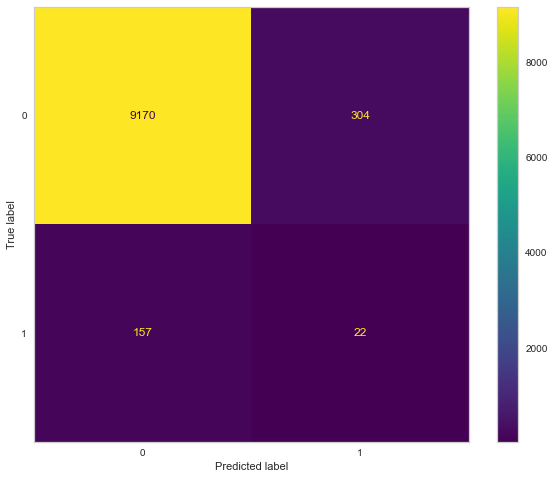

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


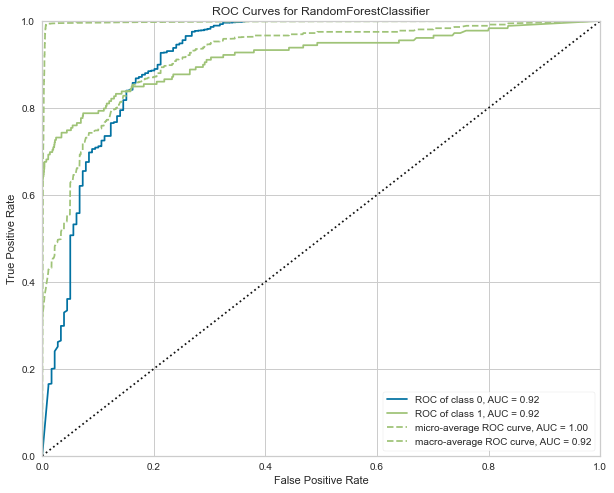

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(rf, X_balanced, y_balanced, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9474
           1       0.07      0.12      0.09       179

    accuracy                           0.95      9653
   macro avg       0.53      0.55      0.53      9653
weighted avg       0.97      0.95      0.96      9653



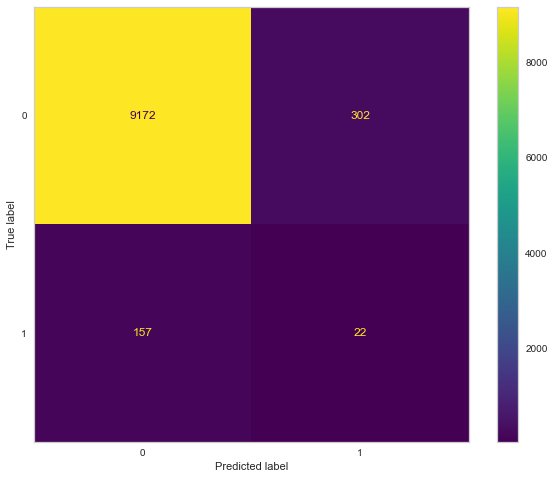

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, rf_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


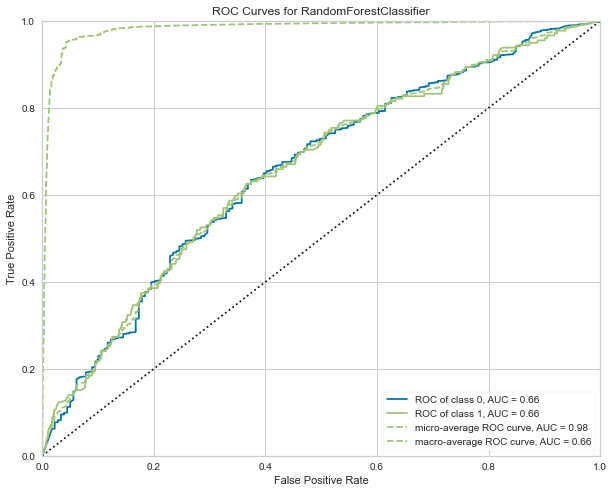

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(rf, X_balanced, y_balanced, X_test, y_test)
plt.show()

##### WOE BIN

In [ ]:
y= y_train.shape[0] + y_test.shape[0]
y

32177

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestClassifier(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9474
           1       0.00      0.00      0.00       179

    accuracy                           0.98      9653
   macro avg       0.49      0.50      0.50      9653
weighted avg       0.96      0.98      0.97      9653



C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


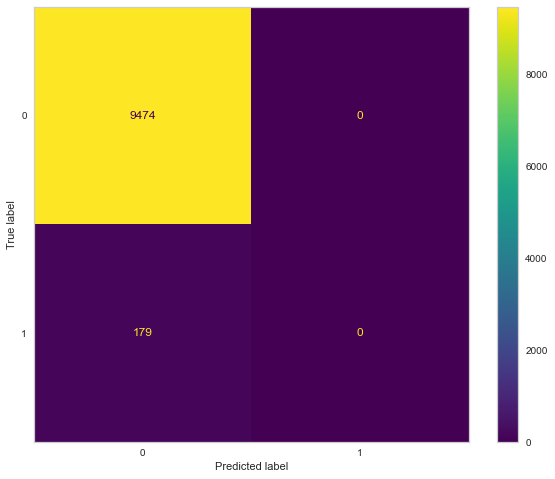

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


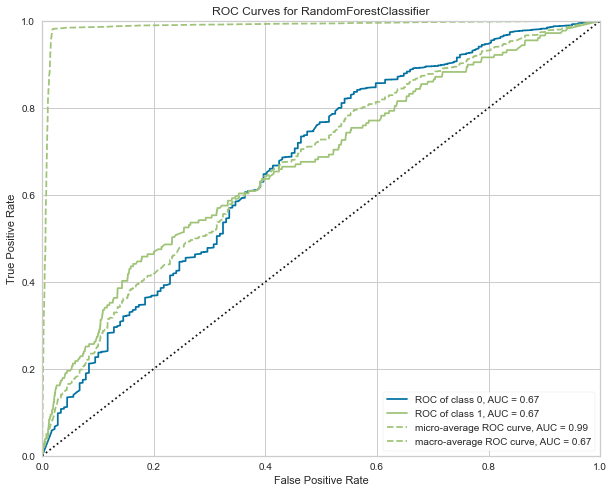

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(rf, X_balanced, y_balanced, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9474
           1       0.00      0.00      0.00       179

    accuracy                           0.98      9653
   macro avg       0.49      0.50      0.50      9653
weighted avg       0.96      0.98      0.97      9653



C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


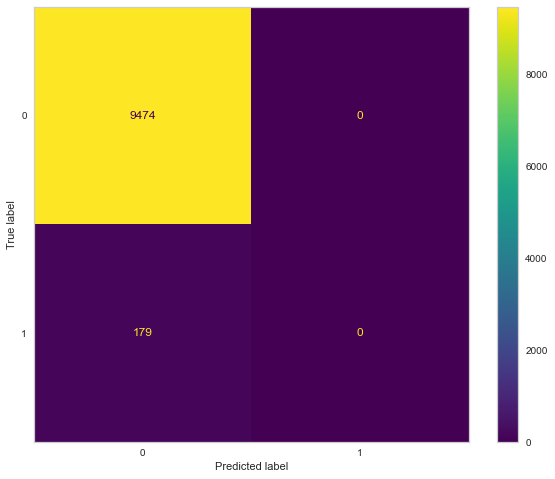

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, rf_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


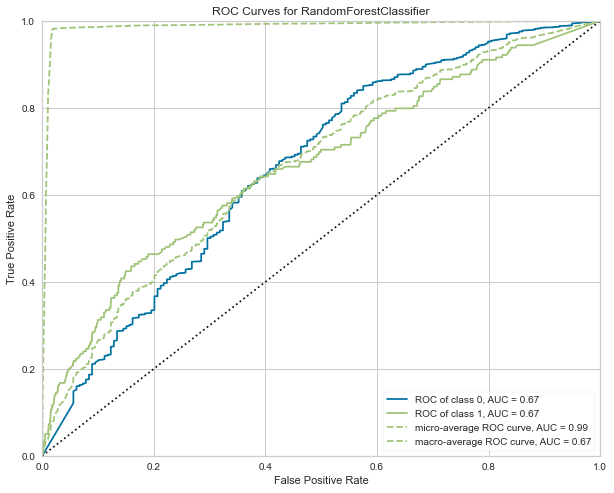

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve(rf, X_balanced, y_balanced, X_test, y_test)
plt.show()

## Neural Network

##### WOE BIN + Oversampling

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(431,input_dim = 7, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(200,activation='relu'))
NN_model.add(Dense(145, activation='relu'))
NN_model.add(Dense(55,activation='relu'))
NN_model.add(Dense(25,activation='relu'))
NN_model.add(Dense(10,activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, activation='relu'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NN_model.fit(X_balanced, y_balanced, epochs=20, batch_size=5)

Epoch 1/20
8842/8842 [==============================] - 20s 2ms/step - loss: 0.5933 - accuracy: 0.6901
Epoch 2/20
8842/8842 [==============================] - 18s 2ms/step - loss: 0.5006 - accuracy: 0.7665
Epoch 3/20
8842/8842 [==============================] - 18s 2ms/step - loss: 0.4880 - accuracy: 0.7943
Epoch 4/20
8842/8842 [==============================] - 19s 2ms/step - loss: 0.4719 - accuracy: 0.8064
Epoch 5/20
8842/8842 [==============================] - 19s 2ms/step - loss: 0.4315 - accuracy: 0.8211
Epoch 6/20
8842/8842 [==============================] - 18s 2ms/step - loss: 0.4211 - accuracy: 0.8288
Epoch 7/20
8842/8842 [==============================] - 18s 2ms/step - loss: 0.4074 - accuracy: 0.8359
Epoch 8/20
8842/8842 [==============================] - 19s 2ms/step - loss: 0.4061 - accuracy: 0.8406
Epoch 9/20
8842/8842 [==============================] - 18s 2ms/step - loss: 0.4238 - accuracy: 0.8431
Epoch 10/20
8842/8842 [==============================] - 18s 2ms/step - l

In [73]:
# predictions = NN_model.predict(X_test_scaled)
# predictions_classes = np.argmax(predictions, axis=-1)
_, accuracy = NN_model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

302/302 [==============================] - 1s 2ms/step - loss: 0.5695 - accuracy: 0.7729
Accuracy: 77.29


In [74]:
y_pred = NN_model.predict(X_test)
y_pred_class = []
for i in y_pred.ravel():
    if i > 0.5:
        y_pred_class.append(1)
    else:
        
        y_pred_class.append(0)
y_pred_class

[0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<ipython-input-75-9f4f5e5a632f>:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = None)


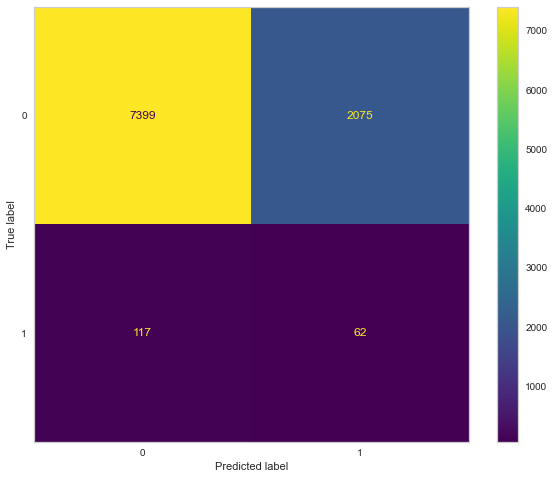

In [75]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

In [78]:
print(f'Neural Network: \n{classification_report(y_test, y_pred_class)}')

Neural Network: 
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      9474
           1       0.03      0.35      0.05       179

    accuracy                           0.77      9653
   macro avg       0.51      0.56      0.46      9653
weighted avg       0.97      0.77      0.86      9653



0.5754363898608718


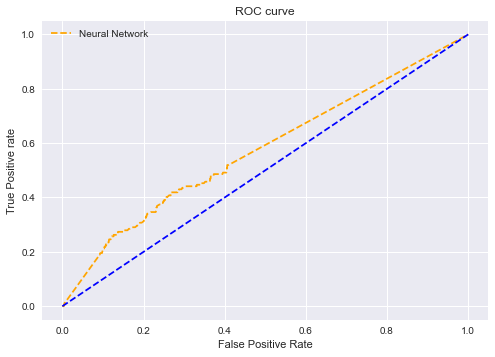

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_score1 = roc_auc_score(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(auc_score1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(nn_fpr_keras, nn_tpr_keras, linestyle='--',color='orange', label='Neural Network')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
# plt.rcParams["figure.figsize"] = (10,8)
# plot_ROC_curve(NN_model, X_balanced, y_balanced, X_test_scaled, y_test)
# plt.show()

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(X_test_scaled, y_pred_class)
# print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

Precision: 0.029013
Recall: 0.346369
F1 score: 0.053541


##### WOE BIN 

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(431,input_dim = 7, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(200,activation='relu'))
NN_model.add(Dense(145, activation='relu'))
NN_model.add(Dense(55,activation='relu'))
NN_model.add(Dense(25,activation='relu'))
NN_model.add(Dense(10,activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, activation='relu'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NN_model.fit(X_train, y_train, epochs=20, batch_size=5)

Epoch 1/20
4505/4505 [==============================] - 13s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 2/20
4505/4505 [==============================] - 13s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 3/20
4505/4505 [==============================] - 12s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 4/20
4505/4505 [==============================] - 12s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 5/20
4505/4505 [==============================] - 12s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 6/20
4505/4505 [==============================] - 13s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 7/20
4505/4505 [==============================] - 13s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 8/20
4505/4505 [==============================] - 13s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 9/20
4505/4505 [==============================] - 14s 3ms/step - loss: 0.2869 - accuracy: 0.9814
Epoch 10/20
4505/4505 [==============================] - 13s 3ms/step - l

In [80]:
# predictions = NN_model.predict(X_test_scaled)
# predictions_classes = np.argmax(predictions, axis=-1)
_, accuracy = NN_model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

302/302 [==============================] - 1s 2ms/step - loss: 0.2860 - accuracy: 0.9815
Accuracy: 98.15


In [81]:
y_pred = NN_model.predict(X_test)
y_pred_class = []
for i in y_pred.ravel():
    if i > 0.5:
        y_pred_class.append(1)
    else:
        
        y_pred_class.append(0)
y_pred_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<ipython-input-82-9f4f5e5a632f>:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = None)


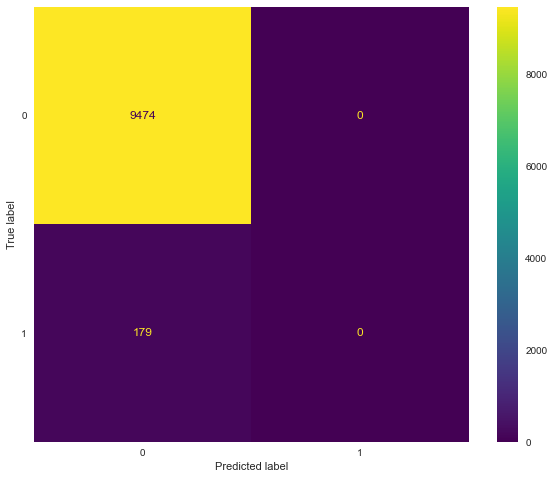

In [82]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

In [83]:
print(f'Neural Network: \n{classification_report(y_test, y_pred_class)}')

Neural Network: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9474
           1       0.00      0.00      0.00       179

    accuracy                           0.98      9653
   macro avg       0.49      0.50      0.50      9653
weighted avg       0.96      0.98      0.97      9653



C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wei-d\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5


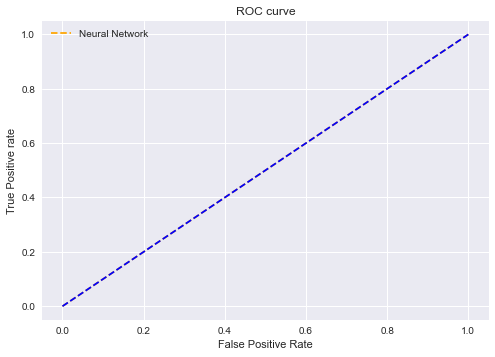

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_score1 = roc_auc_score(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(auc_score1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(nn_fpr_keras, nn_tpr_keras, linestyle='--',color='orange', label='Neural Network')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
# plt.rcParams["figure.figsize"] = (10,8)
# plot_ROC_curve(NN_model, X_balanced, y_balanced, X_test_scaled, y_test)
# plt.show()

# SVM

#### Linear Kernel without oversampling

In [ ]:
from sklearn.svm import SVC

In [ ]:
classif_lnr_wo = SVC(kernel="linear", probability=False, random_state=42)
classif_lnr_wo.fit(X_train, y_train)
svc_lnr_wo_train_score = classif_lnr_wo.score(X_train, y_train)
svc_lnr_wo_test_score = classif_lnr_wo.score(X_test, y_test)
svc_lnr_wo_pred = classif_lnr_wo.predict(X_test)


print(f"SVC without oversampling w/ Linear Kernel Train Score: {svc_lnr_wo_train_score}\n")
print(f"SVC without oversampling w/ Linear Kernel Test Score: {svc_lnr_wo_test_score}")

SVC without oversampling w/ Linear Kernel Train Score: 0.9813976203161072

SVC without oversampling w/ Linear Kernel Test Score: 0.981456542007666


In [ ]:
print(f'Classification Report Linear Kernel SVC w/o oversampling: \n{classification_report(y_test, svc_lnr_wo_pred)}')

Classification Report Linear Kernel SVC w/o oversampling: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9474
           1       0.00      0.00      0.00       179

    accuracy                           0.98      9653
   macro avg       0.49      0.50      0.50      9653
weighted avg       0.96      0.98      0.97      9653



C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


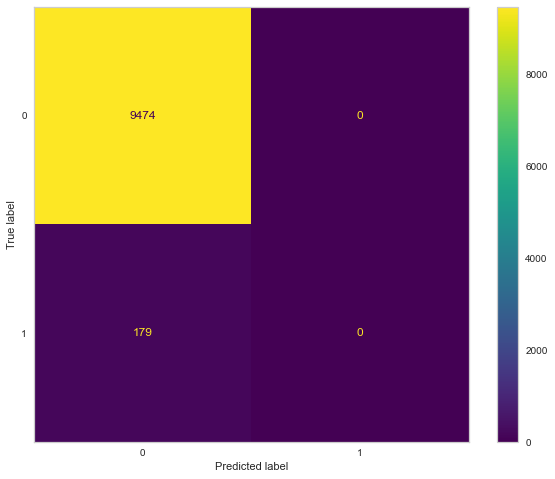

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_lnr_wo_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


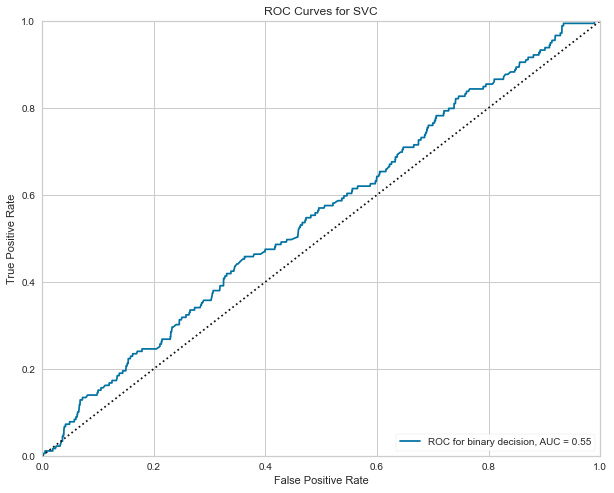

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_lnr_wo, X_train, y_train, X_test, y_test)
plt.show()

#### RBF Kernel without oversampling

In [ ]:
classif_rbf_wo = SVC(kernel="rbf", probability=False, random_state=42)
classif_rbf_wo.fit(X_train, y_train)
svc_rbf_wo_train_score = classif_rbf_wo.score(X_train, y_train)
svc_rbf_wo_test_score = classif_rbf_wo.score(X_test, y_test)
svc_rbf_wo_pred = classif_rbf_wo.predict(X_test)

print(f"SVC w/ RBF Kernel Train Score: {svc_rbf_wo_train_score}\n")
print(f"SVC w/ RBF Kernel Test Score: {svc_rbf_wo_test_score}\n")

SVC w/ RBF Kernel Train Score: 0.9813976203161072

SVC w/ RBF Kernel Test Score: 0.981456542007666



In [ ]:
print(f'Classification Report RBF Kernel SVC without oversampling: \n{classification_report(y_test, svc_rbf_wo_pred)}')

Classification Report RBF Kernel SVC without oversampling: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9474
           1       0.00      0.00      0.00       179

    accuracy                           0.98      9653
   macro avg       0.49      0.50      0.50      9653
weighted avg       0.96      0.98      0.97      9653



C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


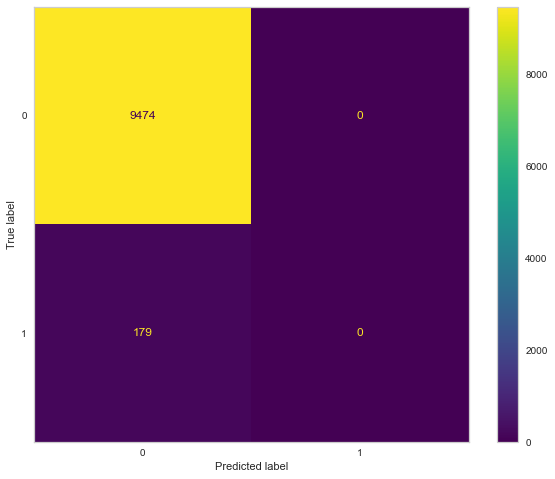

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_rbf_wo_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


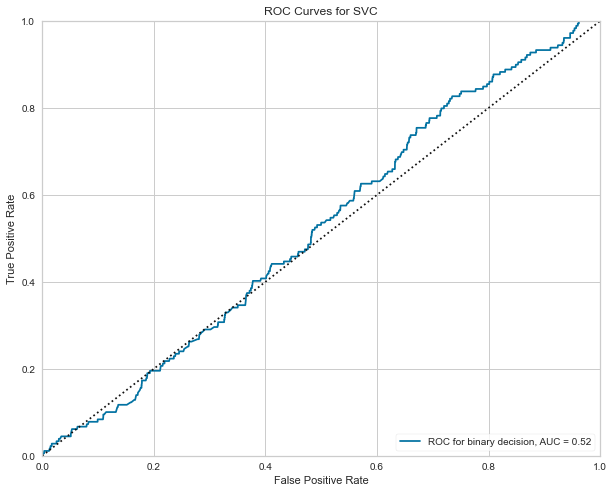

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_rbf_wo, X_train, y_train, X_test, y_test)
plt.show()

#### Linear Kernel with smote oversampling

In [ ]:
classif_lnr = SVC(kernel="linear", probability=False, random_state=42, verbose=True)
classif_lnr.fit(X_balanced, y_balanced)
svc_lnr_train_score = classif_lnr.score(X_balanced, y_balanced)
svc_lnr_test_score = classif_lnr.score(X_test, y_test)
svc_lnr_pred = classif_lnr.predict(X_test)

print(f"SVC w/ Linear Kernel Train Score: {svc_lnr_train_score}\n")
print(f"SVC w/ Linear Kernel Test Score: {svc_lnr_test_score}")

[LibSVM]SVC w/ Linear Kernel Train Score: 0.6351277991404659

SVC w/ Linear Kernel Test Score: 0.5833419662281156


In [ ]:
print(f'Classification Report Linear Kernel SVC: \n{classification_report(y_test, svc_lnr_pred)}')

Classification Report Linear Kernel SVC: 
              precision    recall  f1-score   support

           0       0.99      0.58      0.73      9474
           1       0.03      0.71      0.06       179

    accuracy                           0.58      9653
   macro avg       0.51      0.65      0.40      9653
weighted avg       0.97      0.58      0.72      9653



C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


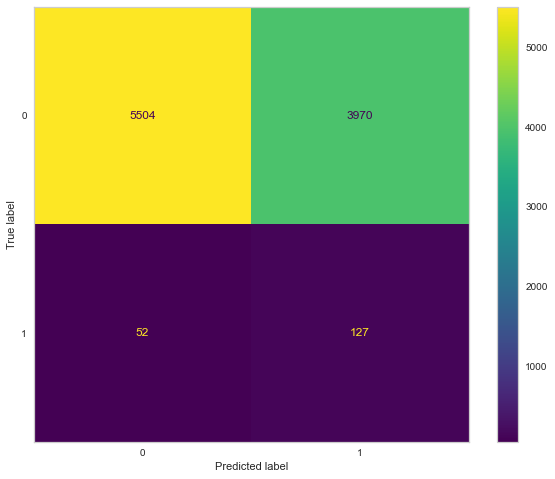

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_lnr_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


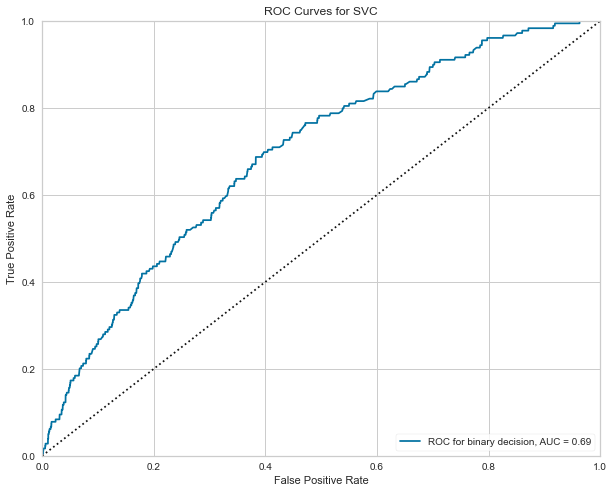

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_lnr, X_balanced, y_balanced, X_test, y_test)
plt.show()

#### RBF Kernel with smote oversampling

In [ ]:
classif_rbf = SVC(kernel="rbf", probability=False, random_state=42)
classif_rbf.fit(X_balanced, y_balanced)
svc_rbf_train_score = classif_rbf.score(X_balanced, y_balanced)
svc_rbf_test_score = classif_rbf.score(X_test, y_test)
svc_rbf_pred = classif_rbf.predict(X_test)

print(f"SVC w/ RBF Kernel Train Score: {svc_rbf_train_score}\n")
print(f"SVC w/ RBF Kernel Test Score: {svc_rbf_test_score}\n")

SVC w/ RBF Kernel Train Score: 0.7372992535625424

SVC w/ RBF Kernel Test Score: 0.668289650885735



In [ ]:
print(f'Classification Report RBF Kernel SVC: \n{classification_report(y_test, svc_rbf_pred)}')

Classification Report RBF Kernel SVC: 
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      9474
           1       0.03      0.51      0.05       179

    accuracy                           0.67      9653
   macro avg       0.51      0.59      0.43      9653
weighted avg       0.97      0.67      0.79      9653



C:\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


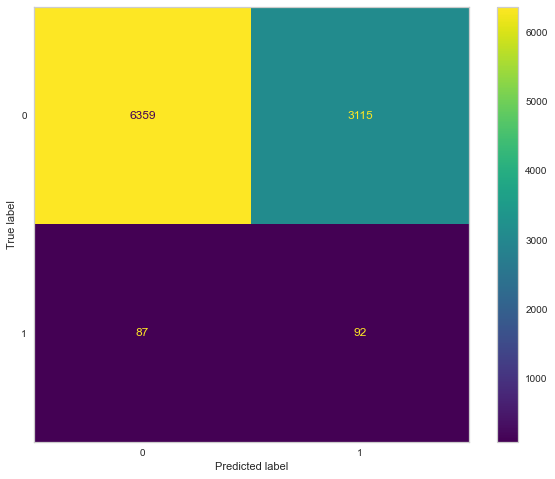

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
mat = confusion_matrix(y_test, svc_rbf_pred)
cmd = ConfusionMatrixDisplay(mat)
cmd.plot()
plt.tick_params(axis = u'both', which = u'both', length = 0)
plt.grid(b = None)
plt.show()

C:\Anaconda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


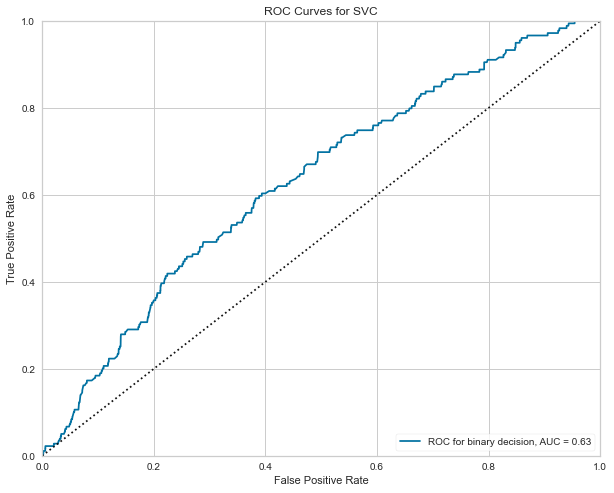

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plot_ROC_curve_svm(classif_rbf, X_balanced, y_balanced, X_test, y_test)
plt.show()

## pickle model dump

In [ ]:
# import pickle

In [ ]:
# # SVM with linear kernel & oversampling

# pkl_file = open('svm_linear_kernel_oversampled.pkl', 'wb')
# pickle.dump(classif_lnr, pkl_file)
# pkl_file.close()

In [ ]:
# # SVM with rbf kernel & oversampling

# pkl_file = open('svm_rbf_kernel_oversampled.pkl', 'wb')
# pickle.dump(classif_rbf, pkl_file)
# pkl_file.close()

In [ ]:
# # log reg with oversampling

# pkl_file = open('logreg_oversampled.pkl', 'wb')
# pickle.dump(lr, pkl_file)
# pkl_file.close()

In [ ]:
# SVM with linear kernel & oversampling

# pkl_file = open('svm_rbf_kernel_oversampled_main.pkl', 'wb')
# pickle.dump(classif_rbf_sm, pkl_file)
# pkl_file.close()

In [ ]:
# decision tree & oversampling

# pkl_file = open('dtree_oversampled_main.pkl', 'wb')
# pickle.dump(dt2, pkl_file)
# pkl_file.close()